<a href="https://colab.research.google.com/github/lomidez/C2C-analysis/blob/main/C2C_Marketplace_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # If libraries are not preinstalled uncomment this cell
# #install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick
# !pip install googletrans==4.0.0-rc1
# !pip install country_converter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr # calculates Pearson's correlation
from googletrans import Translator # translates to english
import country_converter as coco # for countries formatting
import difflib #for countries formatting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **C2C Fashion Marketplace Analysis**

In [ ]:
#upload the dataset
df = pd.read_csv('https://query.data.world/s/llwjlmica3pjhbl7enjoxhliyrkxue?dws=00000')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [ ]:
df_trans = df.iloc[10:12, :].transpose()
df_trans

,10,11
identifierHash,-6727673442828273069,-3703523845250928186
type,user,user
country,Etats-Unis,Espagne
language,en,es
socialNbFollowers,3,3
socialNbFollows,8,8
socialProductsLiked,0,0
productsListed,0,0
productsSold,0,0
productsPassRate,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

##**Part 2: EDA**

**Task:** *In this assignment, we will statistically analyze the datasets to find the distribution. If some numerical data points are missing, they should be replaced appropriately. Correlation between features and the output should be visualized. Hence, we perform exploratory data analysis on the dataset and visualize the data. This will include but not be limited to the following: (Data should be cleaned. For example, mean or median values should replace zeros in inappropriate locations.)*

**Dataset Overview:** *The dataset contains users activity in a fashion marketplace. Users can buy and sell products. They also can follow other users and like products in the same way as in social networks. This dataset does not contain NaN values, they all are replaces with 0s.*


### 2.1 Data Cleaning

*Before looking at the distribution of the variables and analyzing statistical metrics, let's perform initial data cleaning of the dataset in order to gain informative outcomes.*

**1.Deal with Inactive Users**

The fashion store contains all registered clients. As it is a real-life dataset, it is well-known that majority of registered users are not "active", which means that they do not buy and do not sell anything. Analyzing such users is uninfirmative, thus, we will delete them.

Users are "Active" if they are socially active, or buy/sell products. =>

"Inactive" users have all 0s in columns: `'productsSold', 'productsBought', 'productsListed', 'socialProductsLiked', 'productsPassRate', 'productsWished'`

In [ ]:
activity_cols = ['productsSold', 'productsBought', 'productsListed', 'socialProductsLiked', 'productsPassRate', 'productsWished']

# Let's create boolean column that determines if user is active or not
df['Active'] = -(df[activity_cols] == 0).all(axis=1)

# Now, in order to get active users, we should only use the condition df['Active'] == True
df_active = df[df['Active'] == True]
df_inactive = df[df['Active'] == False]

print("Number of active users =", len(df_active))
print("Number of inactive users =", len(df_inactive))

Number of active users = 21639
Number of inactive users = 77274


**2. Drop duplicated and uninformative columns**

In [ ]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Active
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,us,False
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,de,False
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,689,3205,106.83,8.9,se,False
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,tr,False
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,709,3205,106.83,8.9,fr,False


In [ ]:
df.nunique()

identifierHash         98913
type                       1
country                  200
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      420
productsListed            65
productsSold              75
productsPassRate          72
productsWished           279
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       700
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              199
Active                     2
dtype: int64

* `identifierHash` - this variable is just a unique identifier => uninformative, we can drop it.

* `type` - has only 1 unique value == "user" => uninformative, we can drop it.

* `gender`, `civilityGenderId`, `civilityTitle` - these variables have the same meaning, so we can leave only one in our dataset. We will leave `gender` and drop other two colunms.

* `hasAnyApp` - this variable is simply the outcome of the disjunction of `hasAndroidApp` and `hasIosApp` variables => uninformative, we can drop it.


* `countryCode`- this variable just copies the `country` variable, but harder to interpret => uninformative, we can drop it.

In [ ]:
# Drop columns
columns_to_drop = ['type', 'identifierHash', 'civilityTitle', 'civilityGenderId', 'countryCode', 'hasAnyApp']
df.drop(columns = columns_to_drop, axis=1, inplace=True)
df.head()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,Active
0,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,False,False,True,709,3205,106.83,8.9,False
1,Allemagne,de,3,8,0,0,0,0.0,0,0,F,False,False,True,709,3205,106.83,8.9,False
2,Suède,en,3,8,0,0,0,0.0,0,0,M,False,True,True,689,3205,106.83,8.9,False
3,Turquie,en,3,8,0,0,0,0.0,0,0,F,False,False,True,709,3205,106.83,8.9,False
4,France,en,3,8,0,0,0,0.0,0,0,M,False,True,True,709,3205,106.83,8.9,False


**3. Translate "country" variable in english**

In [ ]:
# Create a dictionary with translation for each country from the dataset (in order not to use translation for each row, too time-consuming)
dict_countries = {}
french_countries = set(df.country)
translator = Translator()

for country in french_countries:
    dict_countries[country] = translator.translate(country, dest='en').text

In [ ]:
# Create a variable with translation of the country from french to english
df['country_eng'] = df['country'].map(dict_countries)

In [ ]:
# Example of translation
df[['country', 'country_eng']].head(10)

,country,country_eng
0,Etats-Unis,UNITED STATES
1,Allemagne,Germany
2,Suède,Sweden
3,Turquie,Türkiye
4,France,France
5,Royaume-Uni,United Kingdom
6,Royaume-Uni,United Kingdom
7,Italie,Italy
8,Italie,Italy
9,France,France


In [ ]:
# Drop `country` variable as we have translation now
df = df.drop('country', axis=1)

In [ ]:
# Check countries
print("Unique number of countries:", df.country_eng.nunique())

Unique number of countries: 200


There are 195  countries in the world, which is < 200 => some countries may be written incorrectly or with big uninpretable typoes.

Let's drop unsignificant rows with typoes:



In [ ]:
def is_real_country(country):
      converter = coco.CountryConverter()
      country_names = converter.data['name_short']
      close_matches = difflib.get_close_matches(country, country_names, n=1, cutoff=0.9)
      if close_matches:
          return True
      else:
          return False

# Output countries that are not interpretable with the count of observations for this country
for country in set(df.country_eng):
  if (is_real_country(country) == False):
    print(country, ": number of observations for", country, "=", len(df[df['country_eng']== country]))
    # # drop rows if number of observations <= 15
    if (len(df[df['country_eng']== country]) <= 15):
      print("DROP observations with country", country)
      df = df[df['country_eng'] != country]
      df = df.reset_index(drop=True)

Turkish-and-Caican Islands : number of observations for Turkish-and-Caican Islands = 3
DROP observations with country Turkish-and-Caican Islands
Chili : number of observations for Chili = 49
South Georgia / Sandwich Islands : number of observations for South Georgia / Sandwich Islands = 1
DROP observations with country South Georgia / Sandwich Islands
Congo : number of observations for Congo = 21
St Barthélémy : number of observations for St Barthélémy = 1
DROP observations with country St Barthélémy
St. LUCIA : number of observations for St. LUCIA = 1
DROP observations with country St. LUCIA
Swaziland : number of observations for Swaziland = 1
DROP observations with country Swaziland
Maurice : number of observations for Maurice = 5
DROP observations with country Maurice
Equator : number of observations for Equator = 13
DROP observations with country Equator
Netherlands Antilles : number of observations for Netherlands Antilles = 1
DROP observations with country Netherlands Antilles
Iv

In [ ]:
# The countries that are left
for country in set(df.country_eng):
  if (is_real_country(country) == False):
    print(country, ": number of observations for", country, "=", len(df[df['country_eng']== country]))

Chili : number of observations for Chili = 49
Congo : number of observations for Congo = 21
Ivory Coast : number of observations for Ivory Coast = 30
The Netherlands : number of observations for The Netherlands = 1529
Meeting : number of observations for Meeting = 51
UNITED STATES : number of observations for UNITED STATES = 20602
Argentine : number of observations for Argentine = 39
Scary T : number of observations for Scary T = 77
Chine : number of observations for Chine = 428
Inde : number of observations for Inde = 157
Painted : number of observations for Painted = 26
Suisse : number of observations for Suisse = 859
Chypre : number of observations for Chypre = 55
Pologs : number of observations for Pologs = 193
Czech Republic : number of observations for Czech Republic = 56


Let's check number of unique values now:

In [ ]:
df['country_eng'].nunique()

173

Now < 195 => correct. There are still small typos for countries, but they are interpretable, for now let's leave it as it is.

**4. Replace uninformative 0s**

Let's now look at Active users table and check if there are any uninformative 0s in some of the columns.

In [ ]:
# Active users overview
df_active = df[df['Active'] == True]
df_active_describe = df_active.describe()
df_active_describe

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000
mean,4.558134,9.911932,20.214414,0.426610,0.555961,3.714451,7.144700,0.786186,384.381998,3063.948176,102.131466,8.510921
std,8.157133,112.980945,386.709677,4.367848,4.521598,17.878148,53.501701,4.938747,271.409395,168.275620,5.608980,0.467782
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2852.000000,95.070000,7.920000
25%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.000000,2857.000000,95.230000,7.940000
50%,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401.000000,3196.000000,106.530000,8.880000
75%,4.000000,8.000000,6.000000,0.000000,0.000000,0.000000,2.000000,1.000000,680.000000,3201.000000,106.700000,8.890000
max,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,709.000000,3205.000000,106.830000,8.900000


In [ ]:
# Get columns from Active users, where min value is 0 (because we do not have negative values)
columns_with_zeroes = df_active_describe.columns[df_active_describe.loc['min'] == 0]

# Check number of 0s in columns that contain 0s
print("Number of all active users", len(df_active))
print("Number of 0s for each column:")
df_active[columns_with_zeroes].apply(lambda col: col[col == 0].count())

Number of all active users 21631
Number of 0s for each column:


socialNbFollows           33
socialProductsLiked     5711
productsListed         19908
productsSold           19596
productsPassRate       20697
productsWished         12335
productsBought         16212
dtype: int64

We can observe that for most of the columns the majority of values = 0, thus, replacing them with mean or median is useless.

* `socialProductsLiked` - we will not replace these 0s too, we assume that all of them are informative.

* `socialNbFollows` - from the description of the variables we know that is `socialNbFollows` is the number of accounts this user follows. It is given that new accounts are automatically assigned to follow the official partners. Therefore, this variable cannot be 0. Let's look closer at this variable to analyse with what we can replace 0s.

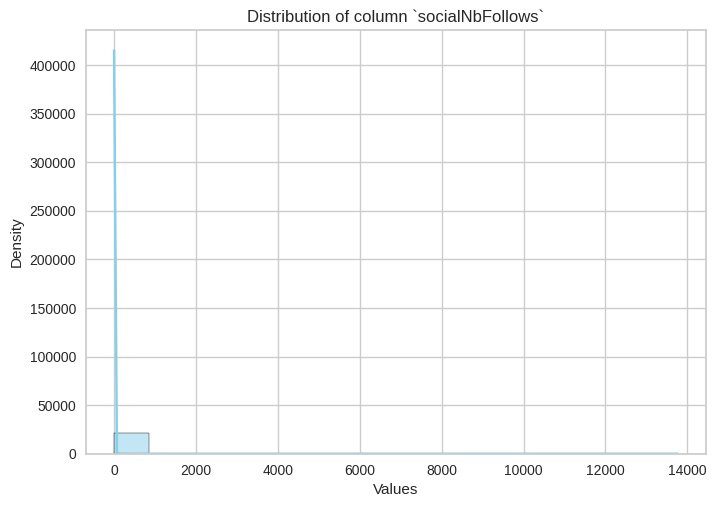

In [ ]:
# Let's look at the distribution plot
sns.histplot(df_active['socialNbFollows'], kde=True, color='skyblue')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of column `socialNbFollows`')
plt.show()

From distrubution plot is strigly right skewed, we can clearly observe that there should be outliers. (One or a little more values are mush bigger than the most values) => We should not replace 0s with mean value.

In [ ]:
# Check the number of unique values
print("Number of unique values for `socialNbFollows` variable:", len(set(df_active['socialNbFollows'])))

Number of unique values for `socialNbFollows` variable: 85


We can see that there are only 85 unique values. Let's look at the biggest values and their frequency.

In [ ]:
# Output 15 largest numbers
pd.value_counts(df_active.socialNbFollows).sort_index(ascending = False).head(15)

13764    1
8268     1
3649     1
2013     1
500      1
482      1
450      1
431      1
421      1
209      1
192      1
189      1
174      1
161      1
157      1
Name: socialNbFollows, dtype: int64

We can observe that value 13764 is deffenetly an outlier => let's drop this row.

In [ ]:
# Delete row from the original df, then subset Active users
df = df[df['socialNbFollows'] != 13764]
df = df.reset_index(drop=True)
df_active = df[df['Active'] == True]

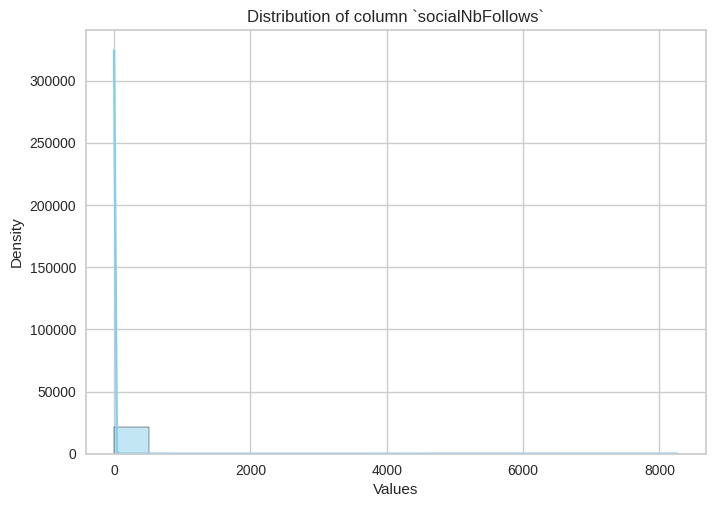

In [ ]:
# Let's look at the distribution plot now
sns.histplot(df_active['socialNbFollows'], kde=True, color='skyblue')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of column `socialNbFollows`')
plt.show()

After deleting the outlier disrtibution is still skewed. However, deleting too many values may also result in undefit of the models => Let's just use median instead of the mean for replacing 0s.

In [ ]:
median_value = df_active['socialNbFollows'].median()
print("Median value of `socialNbFollows` =", median_value)

# Replacing 0s in `socialNbFollows` with median value for all Active users in df
df.loc[df['Active'] & (df['socialNbFollows'] == 0), 'socialNbFollows'] = median_value
df_active = df[df['Active'] == True]

Median value of `socialNbFollows` = 8.0


**5. Deal with categorical variables**

In [ ]:
# Get all categorical variables
df_cat = df.select_dtypes(include=['object', 'bool'])
df_cat.head()

,language,gender,hasAndroidApp,hasIosApp,hasProfilePicture,Active,country_eng
0,en,F,False,False,True,False,UNITED STATES
1,de,F,False,False,True,False,Germany
2,en,M,False,True,True,False,Sweden
3,en,F,False,False,True,False,Türkiye
4,en,M,False,True,True,False,France


**5.1.** Firstly, let's handle boolean variables, convert into int {0, 1}:

* For `Active` : we will not convert it to int type, as we will not use it for predictions, only for subsetting the dataset;

* For `gender` : F(female) - 1, M(male) - 0;

* For `hasAndroidApp`, `hasIosApp`, `hasProfilePicture` : True - 1, False - 0;

In [ ]:
# Covert object to int
df['gender'] = df['gender'].replace({'F': 1, 'M': 0})

# Convert bool variable to int
df['hasAndroidApp'] = df['hasAndroidApp'].astype(int)
df['hasProfilePicture'] = df['hasProfilePicture'].astype(int)
df['hasIosApp'] = df['hasIosApp'].astype(int)

**5.2.** Secondly, handle remaining categorical variables.

In [ ]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,language,country_eng
0,en,UNITED STATES
1,de,Germany
2,en,Sweden
3,en,Türkiye
4,en,France


5.2.1. `language` variable:

In [ ]:
print("Number of unique values in `language` for all users:", df_cat.language.nunique())
print("Number of unique values in `language` for active users:", df[df['Active'] == True].language.nunique())

Number of unique values in `language` for all users: 5
Number of unique values in `language` for active users: 5


In [ ]:
# Check for full dataset
print("Count of each unique value in full dataset:")
pd.value_counts(df.language)

Count of each unique value in full dataset:


en    51500
fr    26352
it     7765
de     7171
es     6012
Name: language, dtype: int64

In [ ]:
# Check for Active users
print("Count of each unique value in Active dataset:")
pd.value_counts(df_active.language)

Count of each unique value in Active dataset:


en    11435
fr     5286
de     1937
it     1930
es     1042
Name: language, dtype: int64

As there are only 5 values for active and all users, so, we can create dummy variables.

In [ ]:
# Create dummy variables insted of "language" variable
dummy = pd.get_dummies(df['language'])
df = pd.concat([df, dummy], axis = 1)
df = df.drop(columns = ['language'])

In [ ]:
# Example pf dummy variables
df[["de","en","es", "fr", "it"]].head(2)

,de,en,es,fr,it
0,0,1,0,0,0
1,1,0,0,0,0


5.2.2. `country_eng` variable

In [ ]:
print("Number of unique values in `country_eng` for all users:", df.country_eng.nunique())
print("Number of unique values in `country_eng` for active users:", df[df['Active'] == True].country_eng.nunique())

Number of unique values in `country_eng` for all users: 173
Number of unique values in `country_eng` for active users: 120


As there are lots of unique countries, and our dataset is not really big, it is not the best solution to create dummy variables for this variable.

We suggest to take 5 most popular countries for Active Users and create dummy variables from these values.

In [ ]:
# Check for Active users
print("Count for 5 most popular countries in Active dataset:")
pd.value_counts(df_active.country_eng.sort_values()).head(5)

Count for 5 most popular countries in Active dataset:


France            4972
UNITED STATES     3927
United Kingdom    2555
Italy             1992
Germany           1835
Name: country_eng, dtype: int64

In [ ]:
# Create dummies

top_countries = df_active['country_eng'].value_counts().head(5).index.tolist()
dummies = pd.get_dummies(df['country_eng'].apply(lambda x: x if x in top_countries else 'other_countries'))
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['country_eng', 'other_countries'], inplace=True)

In [ ]:
df.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,Active,de,en,es,fr,it,France,Germany,Italy,UNITED STATES,United Kingdom
0,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,106.83,8.9,False,0,1,0,0,0,0,0,0,1,0
1,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,106.83,8.9,False,1,0,0,0,0,0,1,0,0,0
2,3,8,0,0,0,0.0,0,0,0,0,1,1,689,3205,106.83,8.9,False,0,1,0,0,0,0,0,0,0,0
3,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,106.83,8.9,False,0,1,0,0,0,0,0,0,0,0
4,3,8,0,0,0,0.0,0,0,0,0,1,1,709,3205,106.83,8.9,False,0,1,0,0,0,1,0,0,0,0


### 2.2 Feature Engineering

*In order to use this dataset for classification task we have to create a categorical variable.*

 We will create a categorical variable `Popularity` from variable `socialNbFollowers` that will be divided into low, medium and high popularity.

In order to create this variable let's look at the distribution of `socialNbFollowers` for active users:

<Axes: >

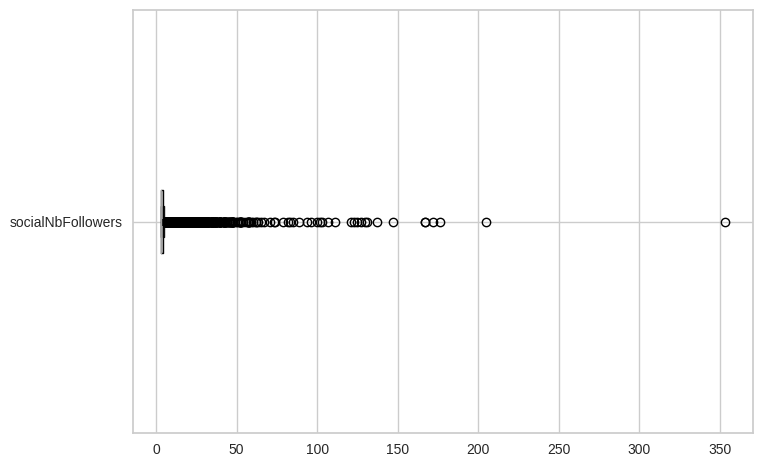

In [ ]:
# Boxplot for active users
df_active = df[df['Active'] == True]
df_active.boxplot(column='socialNbFollowers', vert=False)

In [ ]:
Q1 = df_active['socialNbFollowers'].quantile(0.25)
Q3 = df_active['socialNbFollowers'].quantile(0.75)
median = df_active['socialNbFollowers'].median()
print("Q1 =", Q1)
print("Median =", median)
print("Q3 =", Q3)

Q1 = 3.0
Median = 3.0
Q3 = 4.0


From boxplot we observe that majority of Active users have `socialNbFollowers` = 3. So, let's consider users with `socialNbFollowers` <= 3 as users with "low" `Popularity`

In [ ]:
# Low Popularity
print("Number of Active Users with Low Popularity =",len(df_active[df_active['socialNbFollowers'] <= 3]))

Number of Active Users with Low Popularity = 14503


Approxumately <= 30 `socialNbFollowers` let's consider as "medium" `Popularity`

In [ ]:
# Medium Popularity
print("Number of Active Users with Medium Popularity =", len(df_active[df_active['socialNbFollowers'] <= 30]))

Number of Active Users with Medium Popularity = 21475


And > 30 as "high" `Popularity`

In [ ]:
# High Popularity
print("Number of Active Users with High Popularity =", len(df_active[df_active['socialNbFollowers'] > 30]))

Number of Active Users with High Popularity = 155


In [ ]:
# Create Variable popularity
def create_popularity(val):
    if val <= 3:
        return 'low'
    elif val < 30:
        return 'medium'
    else:
        return 'high'

df['popularity'] = df['socialNbFollowers'].apply(create_popularity)

In [ ]:
# Final df
df.head().T

,0,1,2,3,4
socialNbFollowers,3,3,3,3,3
socialNbFollows,8,8,8,8,8
socialProductsLiked,0,0,0,0,0
productsListed,0,0,0,0,0
productsSold,0,0,0,0,0
productsPassRate,0.0,0.0,0.0,0.0,0.0
productsWished,0,0,0,0,0
productsBought,0,0,0,0,0
gender,1,1,0,1,0
hasAndroidApp,0,0,0,0,0


### (a) The mean, median, and standard deviation

Let's check the metrics for numbercal variables and ignore boolean.

In [ ]:
# For all users
stat_names = ['Mean', 'Median', 'St Dev']
mean1 = []
med = []
std = []

chosen_columns = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed',
                  'productsSold', 'productsPassRate', 'productsWished','productsBought', 'daysSinceLastLogin',
                  'seniority', 'seniorityAsMonths', 'seniorityAsYears']

for col in chosen_columns:
  mean1.append(round(df[col].mean(), 2))
  med.append(round(df[col].median(), 2))
  std.append(round(np.std(df[col]), 2))

pd.DataFrame(np.array([mean1, med, std]), columns=chosen_columns, index=stat_names).T

,Mean,Median,St Dev
socialNbFollowers,3.43,3.00,3.09
socialNbFollows,8.29,8.00,29.66
socialProductsLiked,3.90,0.00,76.09
productsListed,0.09,0.00,2.05
productsSold,0.12,0.00,2.10
productsPassRate,0.81,0.00,8.50
productsWished,1.55,0.00,24.52
productsBought,0.17,0.00,2.33
daysSinceLastLogin,655.76,694.00,7411.63
seniority,3063.76,3196.00,168.30


In [ ]:
# For active users
stat_names = ['Mean', 'Median', 'St Dev']
mean1 = []
med = []
std = []

df_active = df[df['Active'] == True]
for col in chosen_columns:
  mean1.append(round(df_active[col].mean(), 2))
  med.append(round(df_active[col].median(), 2))
  std.append(round(np.std(df_active[col]), 2))

pd.DataFrame(np.array([mean1, med, std]), columns=chosen_columns, index=stat_names).T

,Mean,Median,St Dev
socialNbFollowers,4.52,3.00,6.42
socialNbFollows,9.29,8.00,63.39
socialProductsLiked,17.83,1.00,161.87
productsListed,0.43,0.00,4.37
productsSold,0.55,0.00,4.47
productsPassRate,3.71,0.00,17.87
productsWished,7.06,0.00,52.03
productsBought,0.79,0.00,4.94
daysSinceLastLogin,384.40,401.00,271.40
seniority,3063.94,3196.00,168.27


###(b) Boxplots
Draw boxplots of attributes in one frame.

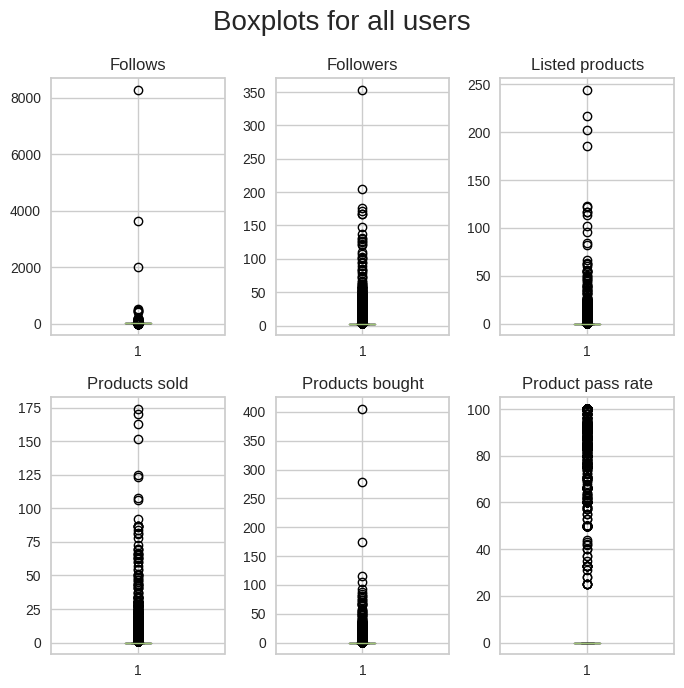

In [ ]:
# All users
fig, ax = plt.subplots(2, 3, figsize=(7, 7))
ax[0,0].boxplot(df["socialNbFollows"])
ax[0,0].set_title("Follows")

ax[0,1].boxplot(df["socialNbFollowers"])
ax[0,1].set_title("Followers")

ax[0,2].boxplot(df["productsListed"])
ax[0,2].set_title("Listed products")

ax[1,0].boxplot(df["productsSold"])
ax[1,0].set_title("Products sold")

ax[1,1].boxplot(df["productsBought"])
ax[1,1].set_title("Products bought")

ax[1,2].boxplot(df["productsPassRate"])
ax[1,2].set_title("Product pass rate")

fig.suptitle("Boxplots for all users", fontsize=20)
plt.tight_layout()
plt.show()

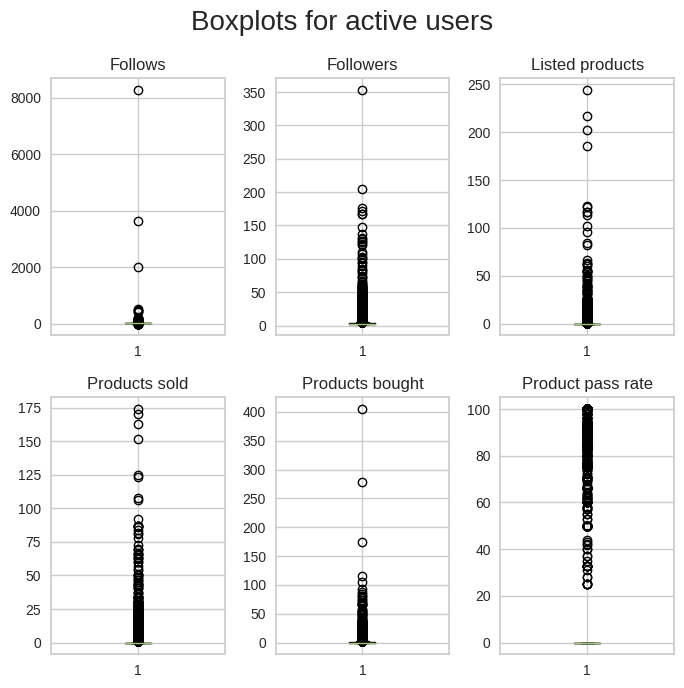

In [ ]:
# Active users
df_active = df[df["Active"] == True]

fig, ax = plt.subplots(2, 3, figsize=(7, 7))
ax[0,0].boxplot(df_active["socialNbFollows"])
ax[0,0].set_title("Follows")

ax[0,1].boxplot(df_active["socialNbFollowers"])
ax[0,1].set_title("Followers")

ax[0,2].boxplot(df_active["productsListed"])
ax[0,2].set_title("Listed products")

ax[1,0].boxplot(df_active["productsSold"])
ax[1,0].set_title("Products sold")

ax[1,1].boxplot(df_active["productsBought"])
ax[1,1].set_title("Products bought")

ax[1,2].boxplot(df_active["productsPassRate"])
ax[1,2].set_title("Product pass rate")

fig.suptitle("Boxplots for active users", fontsize=20)
plt.tight_layout()
plt.show()

### (c) Pairplots
Draw Pairplots

Let's plot separate pairplots for varibles that can potentially be highly correlated. (Have close meaning) And let's look for active users only.

In [ ]:
columns = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed',
                  'productsSold', 'productsPassRate', 'productsWished','productsBought', 'daysSinceLastLogin',
                  'seniority', 'seniorityAsMonths', 'seniorityAsYears']


plot1_cols = ['socialProductsLiked', 'productsWished']
plot2_cols = ['daysSinceLastLogin', 'seniority', 'seniorityAsMonths', 'seniorityAsYears']
plot3_cols = ['productsBought', 'productsWished', 'socialProductsLiked']

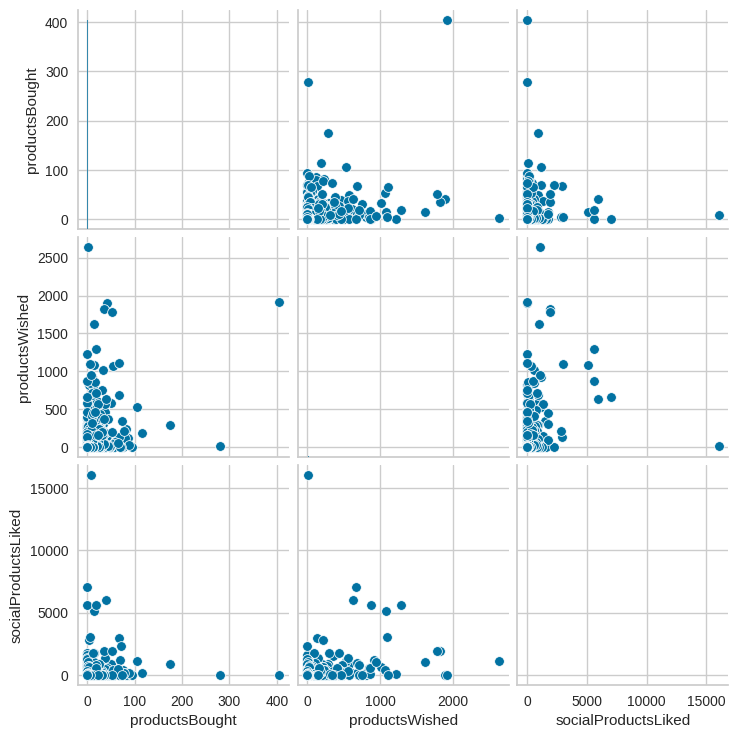

In [ ]:
sns.pairplot(df_active[plot3_cols])

As our data is very imbalanced and distributions are highly sckewed, it is hard to understand from the plot if 'socialProductsLiked' and 'productsWished' are correlated. Let's look in the next step at their Pearson's correlation.

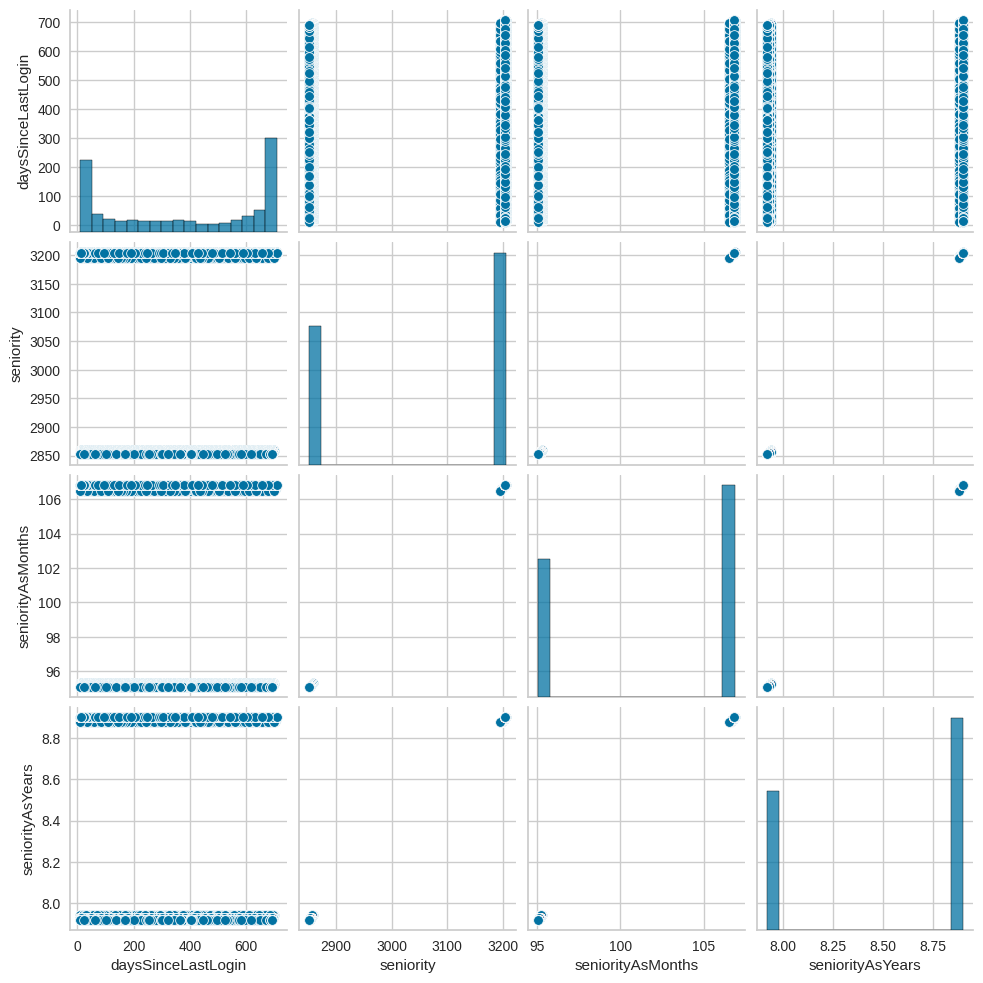

In [ ]:
sns.pairplot(df_active[plot2_cols])

From the distribution plots, we can see that variables `seniorityAsMonths`, `seniorityAsYears` and `seniority` have the same distributions, but different scaling. If we are planning to normalize data before training, these variables would be the same. Therefore, we can drop some of them. As to `daysSinceLastLogin` it is slightly different, so we can keep it.  

In [ ]:
# Drop variables 'seniorityAsMonths' and 'seniorityAsYears'
columns_to_drop = ['seniorityAsMonths', 'seniorityAsYears']
df.drop(columns = columns_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Active,de,en,es,fr,it,France,Germany,Italy,UNITED STATES,United Kingdom,popularity
0,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,False,0,1,0,0,0,0,0,0,1,0,low
1,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,False,1,0,0,0,0,0,1,0,0,0,low
2,3,8,0,0,0,0.0,0,0,0,0,1,1,689,3205,False,0,1,0,0,0,0,0,0,0,0,low
3,3,8,0,0,0,0.0,0,0,1,0,0,1,709,3205,False,0,1,0,0,0,0,0,0,0,0,low
4,3,8,0,0,0,0.0,0,0,0,0,1,1,709,3205,False,0,1,0,0,0,1,0,0,0,0,low


### (d) Correlation
Calculate the correlation if the scatter plot shows a correlation among variables.

In [ ]:
# calculate Pearson's correlation for 'socialProductsLiked' and 'productsWished'
corr, _ = pearsonr(df_active['socialProductsLiked'], df_active['productsWished'])
print('Pearsons correlation between `socialProductsLiked` and `productsWished`: %.3f' % corr)

Pearsons correlation between `socialProductsLiked` and `productsWished`: 0.331


For 'socialProductsLiked' and 'productsWished' correlation is positive and not really big.

In [ ]:
# Let's look at all other possible correlations
df_active = df[df['Active'] == True]
columns = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed',
                  'productsSold', 'productsPassRate', 'productsWished','productsBought', 'daysSinceLastLogin',
                  'seniority']

df_active[columns].corr()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority
socialNbFollowers,1.000000,0.459230,0.299976,0.429164,0.680362,0.401218,0.236222,0.165563,-0.165154,0.024082
socialNbFollows,0.459230,1.000000,0.246870,0.162163,0.083230,0.050310,0.135204,0.009602,-0.022624,0.008101
socialProductsLiked,0.299976,0.246870,1.000000,0.099562,0.088815,0.057102,0.330933,0.143176,-0.106373,-0.016732
productsListed,0.429164,0.162163,0.099562,1.000000,0.593417,0.353022,0.058675,0.056556,-0.115195,-0.005897
productsSold,0.680362,0.083230,0.088815,0.593417,1.000000,0.507425,0.083565,0.101665,-0.140527,0.005743
productsPassRate,0.401218,0.050310,0.057102,0.353022,0.507425,1.000000,0.066129,0.104325,-0.222297,0.002701
productsWished,0.236222,0.135204,0.330933,0.058675,0.083565,0.066129,1.000000,0.392714,-0.130746,-0.010379
productsBought,0.165563,0.009602,0.143176,0.056556,0.101665,0.104325,0.392714,1.000000,-0.139485,-0.002618
daysSinceLastLogin,-0.165154,-0.022624,-0.106373,-0.115195,-0.140527,-0.222297,-0.130746,-0.139485,1.000000,0.014734
seniority,0.024082,0.008101,-0.016732,-0.005897,0.005743,0.002701,-0.010379,-0.002618,0.014734,1.000000


In [ ]:
# Output columns that correlation > |0.5|

correlation_matrix = df_active[columns].corr()

high_correlation_pairs = {}
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        correlation = correlation_matrix.loc[col1, col2]
        if abs(correlation) > 0.5 and col1 != col2:
            high_correlation_pairs[(col1, col2)] = correlation

print("Columns and Correlation:")
for (col1, col2), correlation in high_correlation_pairs.items():
    print(f"{col1} - {col2}: {correlation}")

Columns and Correlation:
socialNbFollowers - productsSold: 0.6803616232706047
productsListed - productsSold: 0.5934167551971835
productsSold - socialNbFollowers: 0.6803616232706047
productsSold - productsListed: 0.5934167551971835
productsSold - productsPassRate: 0.507425137529937
productsPassRate - productsSold: 0.507425137529937


From the table we can see that:

*  `socialNbFollowers` and `productsSold` have the highest positive correlation, which just indicated that more popular users sell more products.

* `productsListed` and `productsSold` have relatively high positive correlation, which indicated that the bigger assortment of products for user lead to more sales.

* `productsPassRate` and `productsSold` have relatively high positive correlaton, which indicated that the more products are sold, the higher would be the Pass Rate.


### (e) Key learnings
Reflect on your key learnings and difficulties while completing this assignment, encapsulating your thoughts in approximately 100 words within a text cell.

In [ ]:
# Final df
df.head().T

,0,1,2,3,4
socialNbFollowers,3,3,3,3,3
socialNbFollows,8,8,8,8,8
socialProductsLiked,0,0,0,0,0
productsListed,0,0,0,0,0
productsSold,0,0,0,0,0
productsPassRate,0.0,0.0,0.0,0.0,0.0
productsWished,0,0,0,0,0
productsBought,0,0,0,0,0
gender,1,1,0,1,0
hasAndroidApp,0,0,0,0,0




**EDA and Data Cleaning:**

1. Conducted exploratory data analysis (EDA) including data cleaning and feature engineering.
2. Eliminated variables that were deemed uninformative or could introduce noise to the analysis.
3. Removed certain rows and replaced zero values with appropriate replacements.
Handled categorical variables, including translating text variables from French to English for better understanding.


**Dataset Insights:**

1. Discovered that the majority of registered users in online stores are inactive.
2. Found that even among active users, only a small fraction exhibit consistent and high activity levels.

**Challenges Faced:**

1. Encountered difficulty in translating country names from French to English due to numerous misprints in the original data.
2. Experienced challenges in deriving meaningful insights from the data due to highly skewed distributions across variables.

**Key Observations:**

1. Noticed a skewed distribution where only a small segment of users demonstrated high activity.
2. Identified a correlation between the number of sold products and user activity, as well as the assortment size.
3. Observed that the majority of users in the dataset were recently registered, indicated by the similarity in distributions between the 'seniority' variable and 'daysSinceLastLogin'.


**Future Steps:**
Plan to undertake a regression task focusing on the 'productsBought' variable in the next step of the project.

##**Part 3: Regression**

**Dataset:** For predictions we are going to use only "Active" users

**Output variable:** `productsBought`

**Evaluation metric:** $R^2$

### 3.1 Simple Linear Regressions

Let's look at the correlation of output variable with attributes in order to check, which varibles may have linear relationship with the output. We will not plot binary variables, as they do not have linear relationship with the output.

In [ ]:
%matplotlib inline

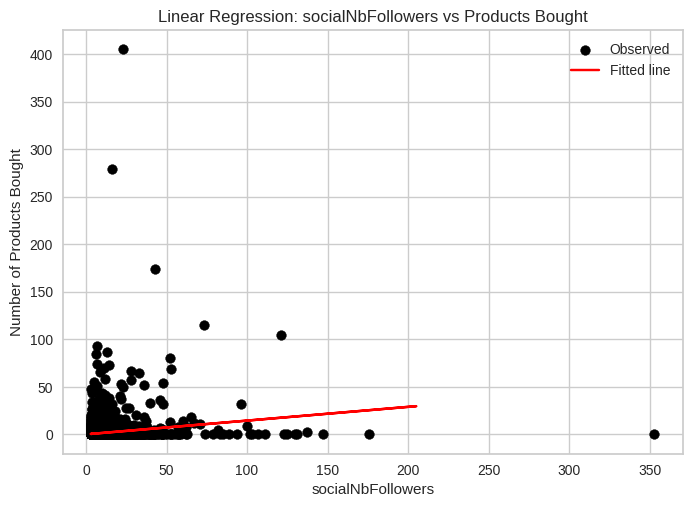

R-squared for socialNbFollowers: -0.0070635744717260085


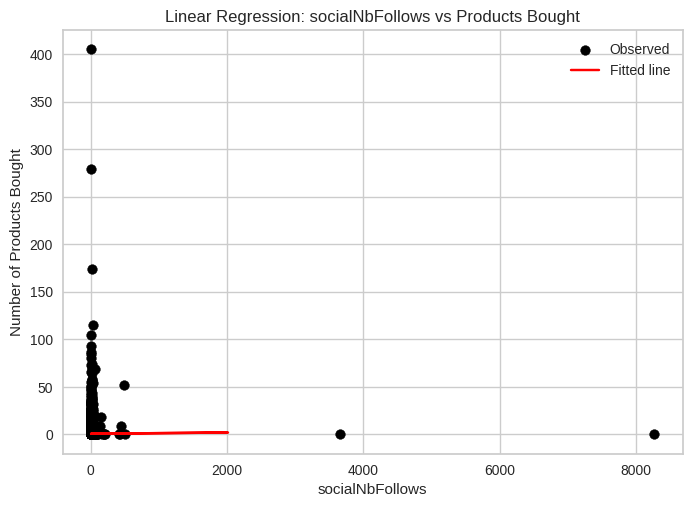

R-squared for socialNbFollows: -6.599727290446111e-05


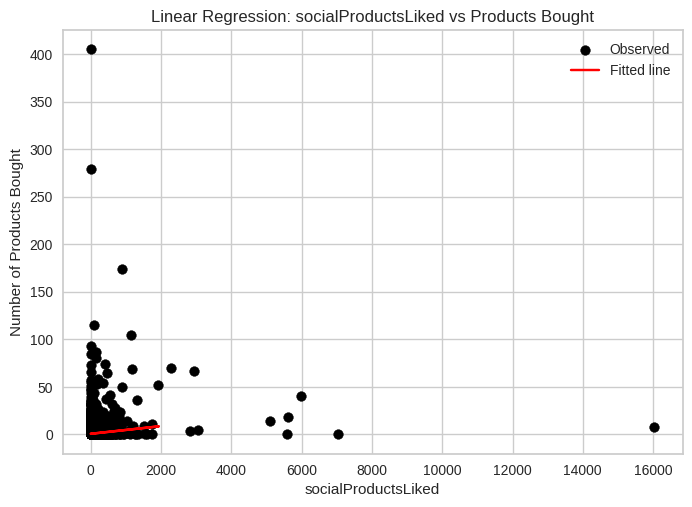

R-squared for socialProductsLiked: 0.03821855122918738


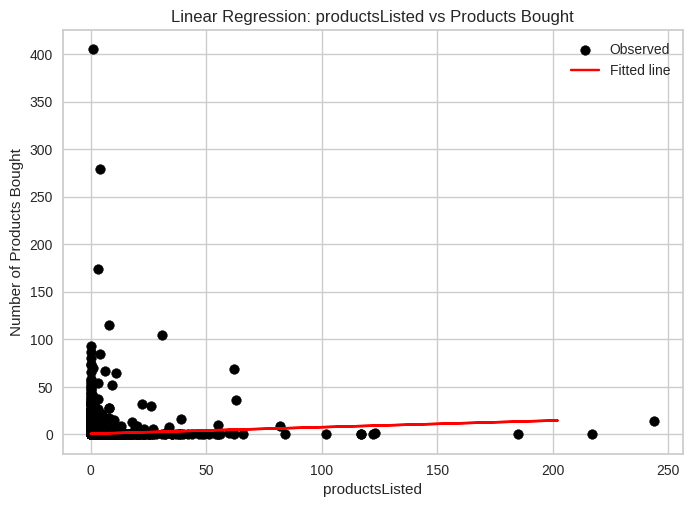

R-squared for productsListed: 0.0014828942989847382


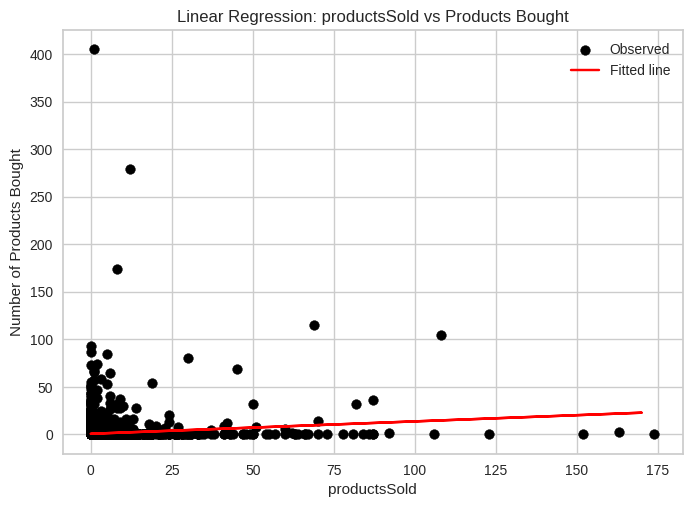

R-squared for productsSold: -0.015099983296012143


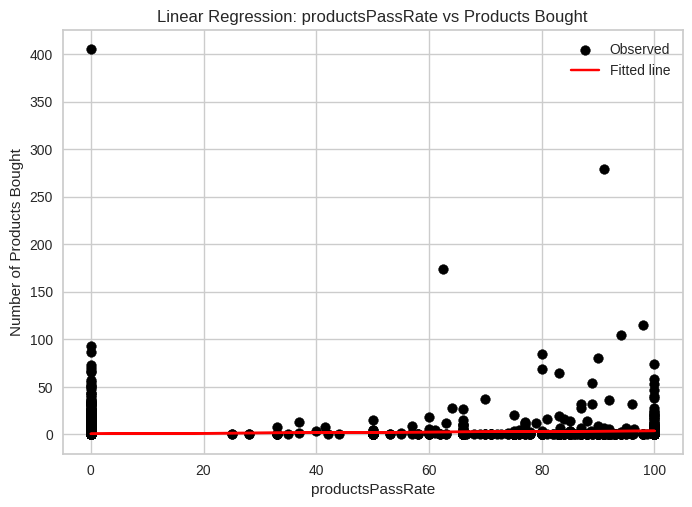

R-squared for productsPassRate: 0.006400161654177672


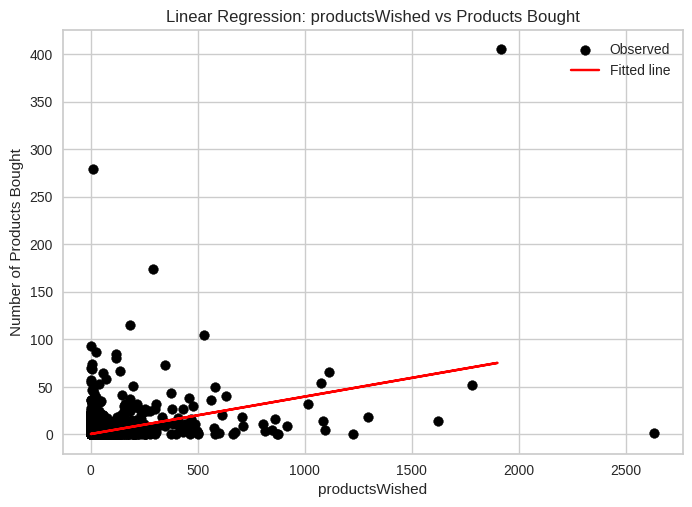

R-squared for productsWished: 0.19250869434454876


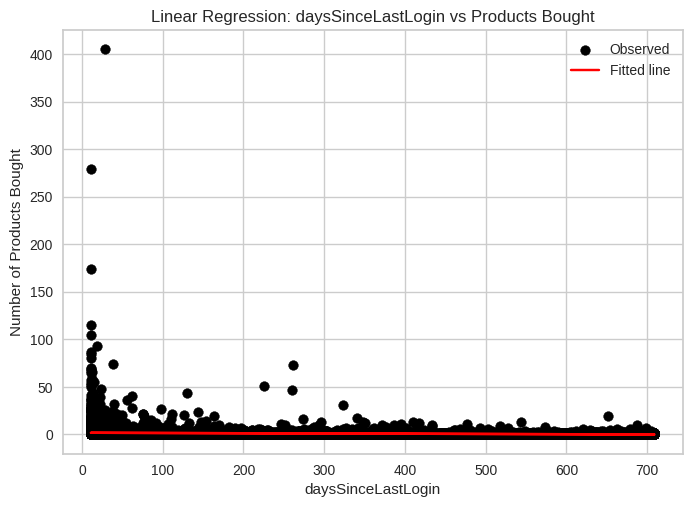

R-squared for daysSinceLastLogin: 0.037020757801302984


In [ ]:
feature_columns = df_active.columns.drop(['productsBought', 'popularity', 'Active', 'gender', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
                                          'de', 'en', 'es', 'fr', 'it', 'France', 'Germany', 'Italy', 'UNITED STATES', 'United Kingdom', 'seniority'])

for column in feature_columns:
    X = df_active[column].values.reshape(-1, 1)
    y = df_active['productsBought'].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r_squared = model.score(X_test, y_test)

    plt.scatter(X_train, y_train, color='black', label='Observed')
    plt.plot(X_test, y_pred, color='red', label='Fitted line')
    plt.xlabel(column)
    plt.ylabel('Number of Products Bought')
    plt.title(f'Linear Regression: {column} vs Products Bought')
    plt.legend()
    plt.show()
    print(f"R-squared for {column}: {r_squared}")

### 3.2 Multiple Linear Regression

Let's build a regression model on the whole dataset.

In [ ]:
# train test split
df_active = df[df['Active'] == True]
X = df_active.copy()
X = X.drop(columns=['productsBought', 'popularity', 'Active'])
y = df_active['productsBought']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
result = model.fit()

In [ ]:
# Output summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         productsBought   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:49:26   Log-Likelihood:                -51663.
No. Observations:               17304   AIC:                         1.034e+05
Df Residuals:                   17281   BIC:                         1.036e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7908    

In [ ]:
# Calculate R-squared
y_pred = result.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("Multiple Linear Regression model R-squared:", "{:.4f}".format(r_squared))

Multiple Linear Regression model R-squared: 0.2046


### 3.3 Updated Multiple Linear Regression

Now, let's drop variables that are not significant (have high p-value) and build new regression on the updated dataset.

In [ ]:
# take subset of more significant varibales
insignificant_columns = ['socialProductsLiked', 'Germany', 'United Kingdom', 'seniority',
                         'UNITED STATES','hasAndroidApp', 'hasProfilePicture', 'en']

X = X.drop(columns = insignificant_columns)

In [ ]:
# train test split
y = df_active['productsBought']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
result = model.fit()

In [ ]:
# Output summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         productsBought   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     239.3
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:49:27   Log-Likelihood:                -51664.
No. Observations:               17304   AIC:                         1.034e+05
Df Residuals:                   17288   BIC:                         1.035e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9920      0

In [ ]:
# Calculate R-squared
y_pred = result.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("Updated Multiple Linear Regression model R-squared:", "{:.4f}".format(r_squared))

Updated Multiple Linear Regression model R-squared: 0.2057


### 3.4 Key learnings

**Simple Linear Regressions:**
  From scatter plots, simple linear regression plots and $R^2$ of numerical variables we got that the varible that has the most linear dpenedency with the output is`productsWished` ($R^2 = 0.193$), which can be interpreted as: the more products a user has in a wish list, the more products the user buys. However, most of the variables in the dataset do not have a linear relationship with the output.

**Multiple Linear regression:**
  For a Baseline Model, we trained Multiple Linear Regression on all variables and obtained $R^2 = 0.2046$, which is better than simple linear regression on any of the attributes, but still very low. Therefore, we tried to improve the performance of the model.

**Updated Multiple Linear Regression:**
  In order to improve the performance, we looked at the summary of the linear regression and, judging by the high p-value scores, deleted insignificant attributes that could add noise to the data and decrease linear model performance. We tried deleting various subsets of insignificant variables, but the final one had the highest $R^2 = 0.2057$. Therefore, we were able to slightly increase the performance of multiple linear regression.


Overall, from simple linear regression plots we observed that most variables do not have a linear relationship with the output. Therefore, low R-squared in multiple linear regression was predictable. We were able to increase R-squared a little bit by deleting insignificant variables, but the performance of the linear regression on the given dataset is still pretty bad. More complex models probably would work better on this dataset, as dependency with the output is definitely more complex than linear.

##**Part 4: Clustering and Classification**

### 4.1 Clustering

*Use Agglomerative, k-means, mini-batch k-means, and mean-shift clustering methods.  Compare the results and select the most suitable clustering method for your dataset.*

**Dataset:** For clustering we are going to use only "Active" users

**Evaluation metrics:**  Silhouette Coefficient, Davies-Bouldin Index

Silhouette Coefficient - measures how well each data point fits into its assigned cluster and ranges from -1 to 1, with higher values indicating better clustering.

Davies-Bouldin Index -  evaluates clustering quality based on the balance between intra-cluster similarity and inter-cluster dissimilarity, aiming for lower values to indicate better clustering.

In [ ]:
df_act = df[df['Active'] == True]
df_active = df_act.copy()
df_active = df_active.drop(columns=['popularity', 'Active'])

Clustering_name = []
Silhouette_coefs= []
DB_indices = []

df_active.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,de,en,es,fr,it,France,Germany,Italy,UNITED STATES,United Kingdom
6,3,8,4,0,0,0.0,0,0,1,0,0,1,591,3205,0,1,0,0,0,0,0,0,0,1
17,3,8,370,0,0,0.0,1,0,1,0,0,1,42,3205,0,1,0,0,0,0,0,0,0,0
18,3,8,1,0,0,0.0,0,0,1,0,0,1,32,3205,0,1,0,0,0,0,0,0,1,0
27,3,8,27,0,0,0.0,0,0,0,0,1,1,669,3205,1,0,0,0,0,0,1,0,0,0
29,3,8,0,0,0,0.0,9,0,1,1,0,1,463,3205,0,1,0,0,0,0,0,0,0,0


1. Normalize data

In [ ]:
X = df_active
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X = X_normalized

2. Try PCA

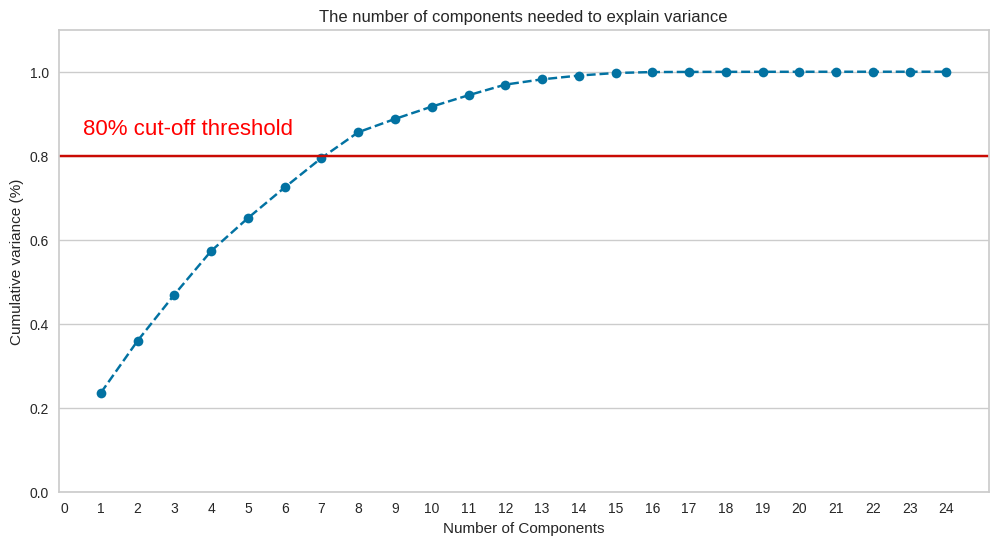

In [ ]:
# Source Code: https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components
pca = PCA().fit(X_normalized)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 25, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We should take first n components that explain the most of the variance, often people consider 80% of variance. From the plot of cumulative variance we can see that the optimal number of components is 7.

In [ ]:
pca = PCA(n_components = 7)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

#### 4.1.1 Agglomerative Clustering

In [ ]:
fig = ff.create_dendrogram(X.T, orientation='left', labels=df_active.columns)
fig.update_layout(width=800, height=800)
fig.show()

From the dendrogram, let's have 2 clusters

In [ ]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters = 2)
cluster_labels = cluster.fit_predict(X)

Let's plot the result of clustering on variables `socialNbFollowers` and `productsSold`

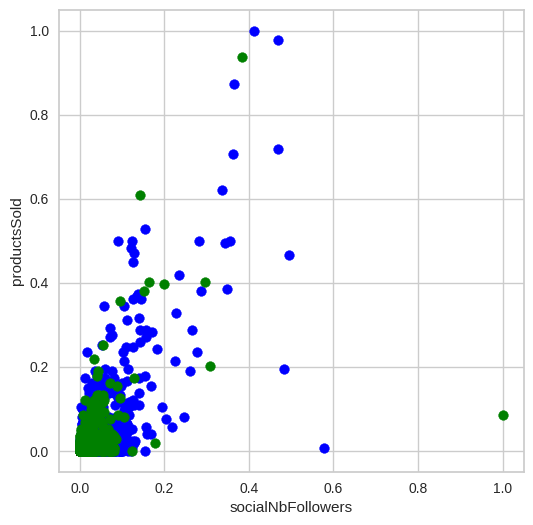

In [ ]:
frame = pd.DataFrame(X)
frame.columns = df_active.columns
frame['cluster'] = cluster_labels
color = ['blue', 'green', 'purple', 'black']
plt.rcParams["figure.figsize"] = (6,6)
for k in range(0, 2):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['socialNbFollowers'], data['productsSold'], c = color[k])
  plt.xlabel('socialNbFollowers')
  plt.ylabel('productsSold')

plt.show()

In [ ]:
ss = silhouette_score(X, cluster.labels_)
dbs = davies_bouldin_score(X, cluster.labels_)

Clustering_name.append("Agglomerative")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

Agglomerative Clustering after PCA

In [ ]:
fig = ff.create_dendrogram(X_principal.T, orientation='left', labels=X_principal.columns)
fig.update_layout(width=800, height=800)
fig.show()

Let's plot results of clustering on first two principle components

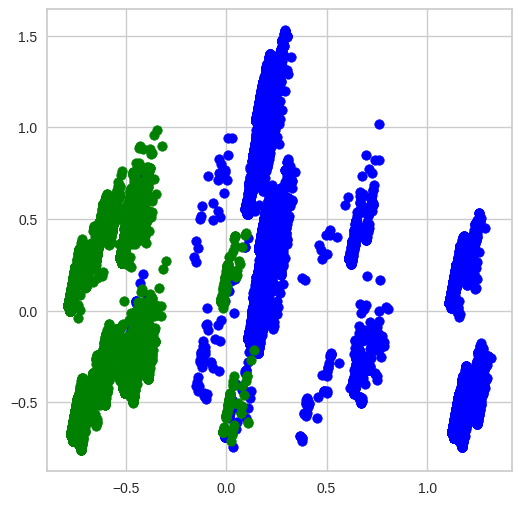

In [ ]:
# Agglomerative Clustering after PCA
cluster = AgglomerativeClustering(n_clusters = 2)
cluster_labels = cluster.fit_predict(X_principal)

# Results of clustering on first two principle components
frame = pd.DataFrame(X_principal)
frame.columns = X_principal.columns
frame['cluster'] = cluster_labels
plt.rcParams["figure.figsize"] = (6,6)
color = ['blue', 'green', 'purple', 'black']
for k in range(0, 2):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['P1'], data['P2'], c = color[k])
plt.show()

In [ ]:
ss = silhouette_score(X_principal, cluster.labels_)
dbs = davies_bouldin_score(X_principal, cluster.labels_)
Clustering_name.append("Agglomerative after PCA")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

####4.1.2 K-means Clustering

First of all, unlike agglomerative clustering, for K-means clustering we have to specify number of clusters. Thus, let's find optimal k using Elbow method.

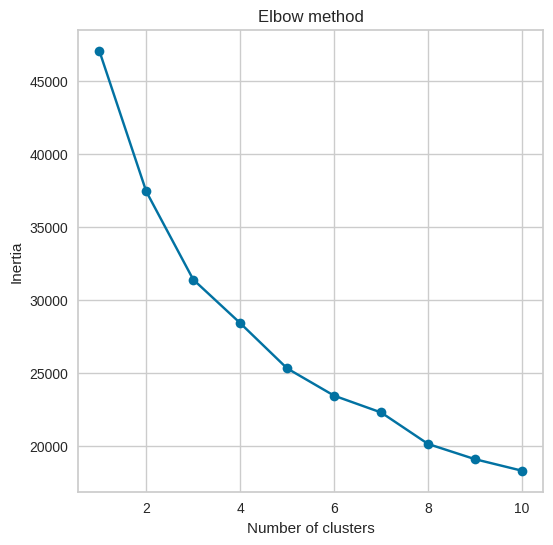

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It is hard to see the optimal value of clusters from the plot, where we use Inertia (within-cluster sum of squares). Let's try another metric.

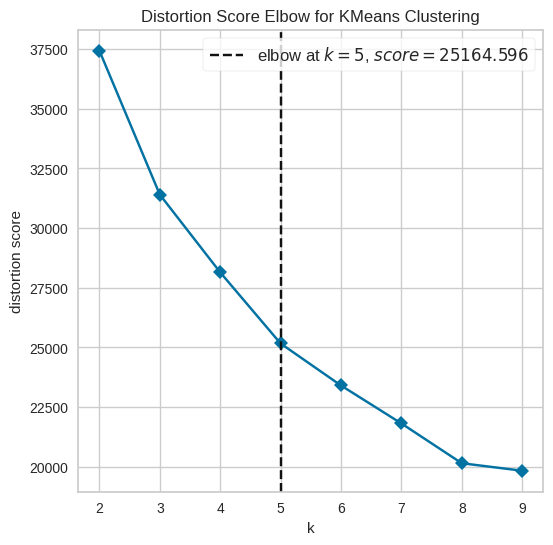

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.show()

It is still hard to identify optimal k, but the KElbowVisualizer plot recommends to choose  k = 5, because for k = 5 rate of decrease in distortion (within-cluster variation) sharply shifts.

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
cluster_labels = kmeans.labels_

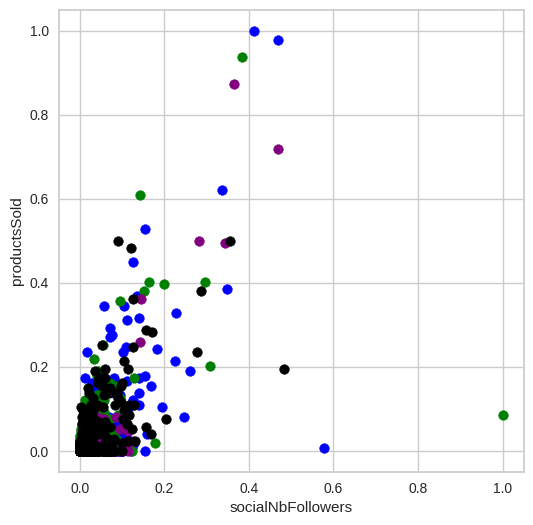

In [ ]:
frame = pd.DataFrame(X)
frame.columns = df_active.columns
frame['cluster'] = cluster_labels
color = ['blue', 'green', 'purple', 'black', 'grey']
plt.rcParams["figure.figsize"] = (6,6)
for k in range(0, 4):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['socialNbFollowers'], data['productsSold'], c = color[k])
  plt.xlabel('socialNbFollowers')
  plt.ylabel('productsSold')

cluster_centers = kmeans.cluster_centers_

plt.show()

In [ ]:
ss = silhouette_score(X, kmeans.labels_)
dbs = davies_bouldin_score(X, kmeans.labels_)

Clustering_name.append("K-means")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

K-means clustering after PCA

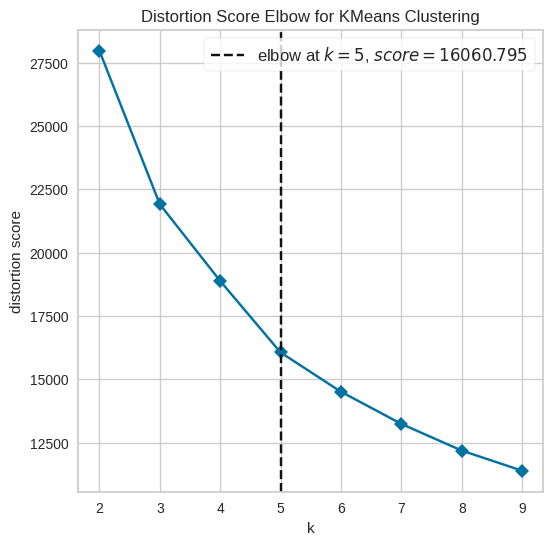

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X_principal)
visualizer.show()

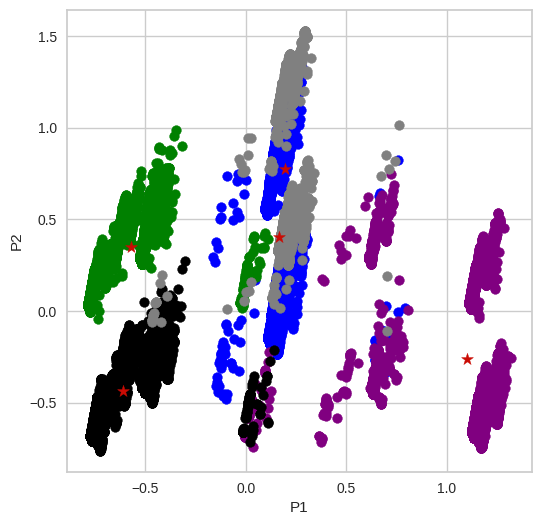

In [ ]:
# K-means Clustering after PCA
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_principal)
cluster_labels = kmeans.labels_

# Results of clustering on first two principle components
frame = pd.DataFrame(X_principal)
frame.columns = X_principal.columns
frame['cluster'] = cluster_labels
plt.rcParams["figure.figsize"] = (6,6)
color = ['blue', 'green', 'purple', 'black', 'grey']
for k in range(0, 5):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['P1'], data['P2'], c = color[k])
  plt.xlabel('P1')
  plt.ylabel('P2')

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)

plt.show()

In [ ]:
ss = silhouette_score(X_principal, kmeans.labels_)
dbs = davies_bouldin_score(X_principal, kmeans.labels_)
Clustering_name.append("K-means after PCA")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

#### 4.1.3 Mini-batch K-means Clustering

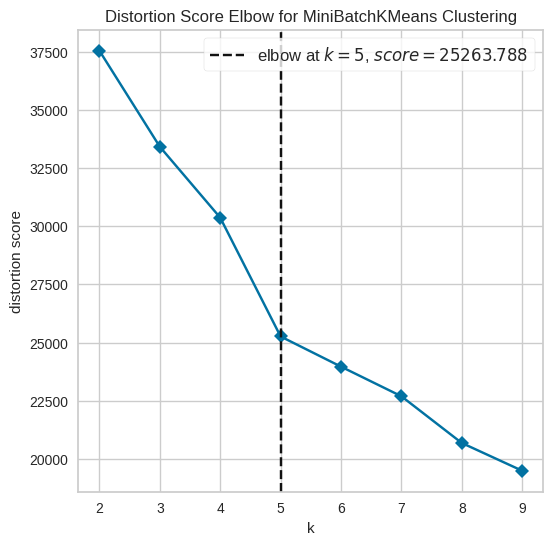

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = MiniBatchKMeans(batch_size=100) # TODO: change batch_size from 100 to 1024
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.show()

In [ ]:
mbk = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=100, n_init="auto")
mbk.fit(X)
cluster_labels = mbk.labels_

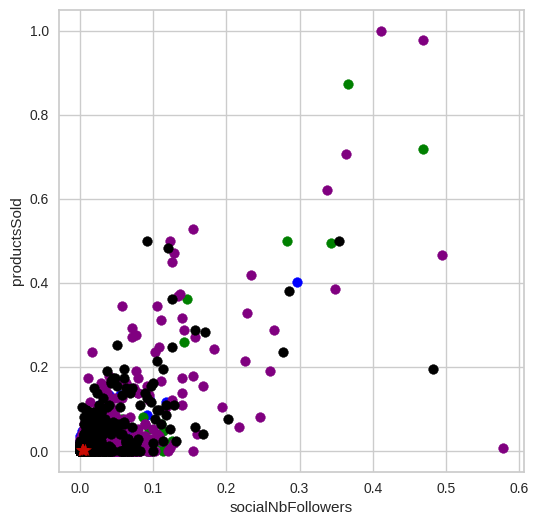

In [ ]:
frame = pd.DataFrame(X)
frame.columns = df_active.columns
frame['cluster'] = cluster_labels
color = ['blue', 'green', 'purple', 'black', 'grey']
plt.rcParams["figure.figsize"] = (6,6)
for k in range(0, 4):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['socialNbFollowers'], data['productsSold'], c = color[k])
  plt.xlabel('socialNbFollowers')
  plt.ylabel('productsSold')

cluster_centers = mbk.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)

plt.show()


In [ ]:
ss = silhouette_score(X, mbk.labels_)
dbs = davies_bouldin_score(X, mbk.labels_)

Clustering_name.append("Mini Batch K-means")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

Mini-batch K-means Clustering after PCA

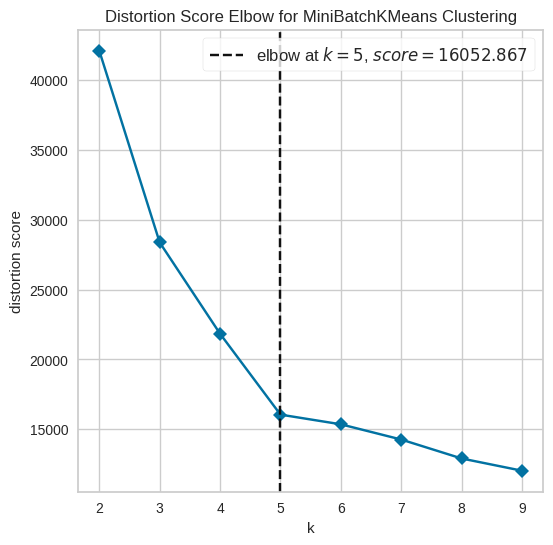

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = MiniBatchKMeans(batch_size=100)
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X_principal)
visualizer.show()

In [ ]:
mbk = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=100, n_init="auto") # TODO: change batch_size from 100 to 1024
mbk.fit(X_principal)
cluster_labels = mbk.labels_

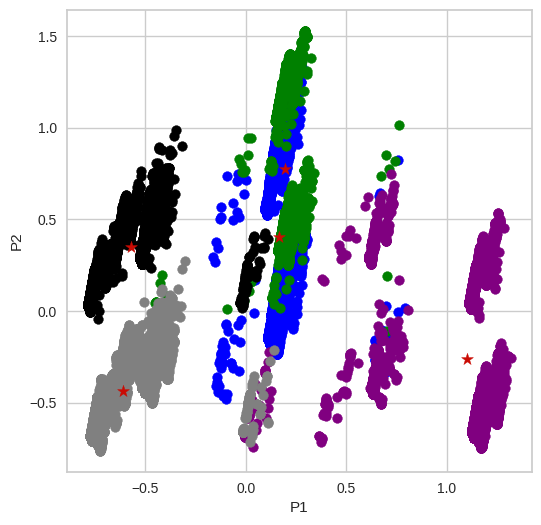

In [ ]:
# Mini-batch K-means Clustering after PCA
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_principal)
cluster_labels = kmeans.labels_

# Results of clustering on first two principle components
frame = pd.DataFrame(X_principal)
frame.columns = X_principal.columns
frame['cluster'] = cluster_labels
plt.rcParams["figure.figsize"] = (6,6)
color = ['blue', 'green', 'purple', 'black', 'grey']
for k in range(0, 5):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['P1'], data['P2'], c = color[k])
  plt.xlabel('P1')
  plt.ylabel('P2')

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)

plt.show()

In [ ]:
ss = silhouette_score(X_principal, mbk.labels_)
dbs = davies_bouldin_score(X_principal, mbk.labels_)

Clustering_name.append("Mini Batch K-means after PCA")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

#### 4.1.4 Mean-Shift clustering

In [ ]:
msh = MeanShift(bandwidth = 1.6) # 4 clusters
# for bandwidth 0.9, resulted in too many clusters => increase it
# for bandwidth 2, resulted in 1 cluster => decrease it
# for bandwidth 1.3, resulted in 12 clister =>  increase a little

msh.fit(X)
cluster_labels = msh.labels_
cluster_centers = msh.cluster_centers_

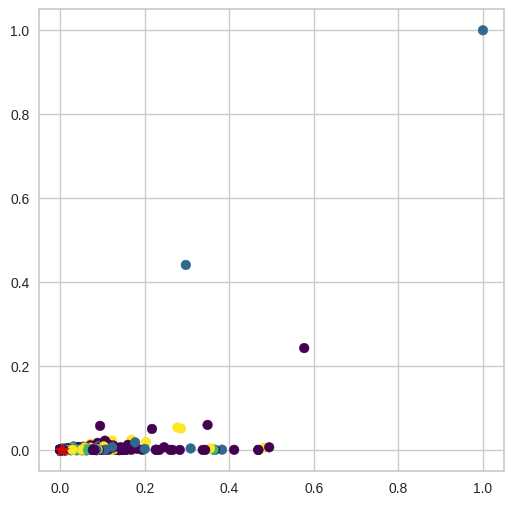

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)
plt.show()

In [ ]:
ss = silhouette_score(X, msh.labels_)
dbs = davies_bouldin_score(X, msh.labels_)

Clustering_name.append("Mean-Shift")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

Mean-Shift clustering after PCA

In [ ]:
msh = MeanShift(bandwidth = 1.6) # 3 clusters
msh.fit(X_principal)
cluster_labels = msh.labels_
cluster_centers = msh.cluster_centers_

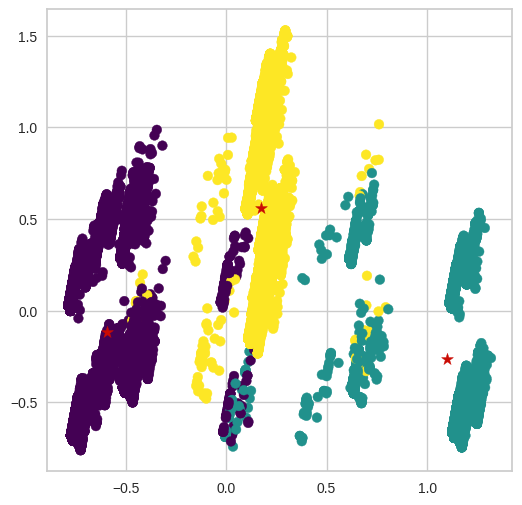

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'], c = cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)
plt.show()

In [ ]:
ss = silhouette_score(X_principal, msh.labels_)
dbs = davies_bouldin_score(X_principal, msh.labels_)

Clustering_name.append("Mean-Shift after PCA")
Silhouette_coefs.append("{:.3f}".format(ss))
DB_indices.append("{:.3f}".format(dbs))

####4.1.5  Comparison of Clustering methods

In [ ]:
metrics = {
    'Clustering Model' : Clustering_name,
    'Silhouette Coefficient': Silhouette_coefs,
    'Davies-Bouldin Index': DB_indices
}

clustering_metrics = pd.DataFrame(metrics)
clustering_metrics

,Clustering Model,Silhouette Coefficient,Davies-Bouldin Index
0,Agglomerative,0.234,1.528
1,Agglomerative after PCA,0.347,1.335
2,K-means,0.265,1.606
3,K-means after PCA,0.497,0.877
4,Mini Batch K-means,0.187,1.798
5,Mini Batch K-means after PCA,0.397,1.216
6,Mean-Shift,0.319,1.327
7,Mean-Shift after PCA,0.463,0.933


Form table based on the Silhouette Coefficient	Davies-Bouldin Index, we can observe that "K-means after PCA" clustering model has the best performance compared to other clustering methods. On the original normalized dataset without PCA the best performace showed Mean-Shift model.

Now, let's tune hyperparameters of k-means model and try to obtain the best clusters.

New Silhouette Coefficient = 0.44279785363563484
New Davies-Bouldin Index = 0.9884715923445843


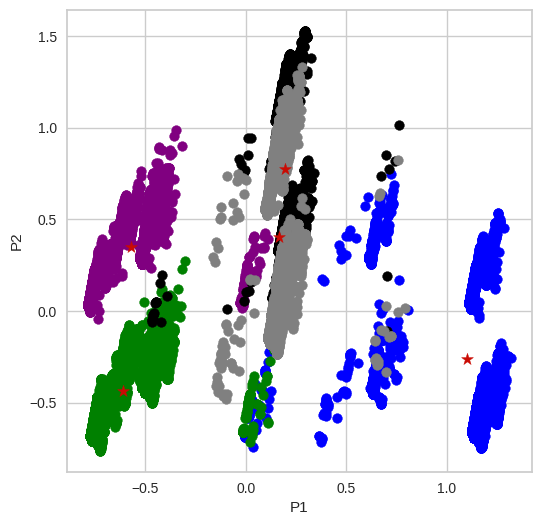

In [ ]:
# K-means Clustering after PCA
kmeans = KMeans(n_clusters=5, n_init=100) #changed hyperparameter n_init for better performance
kmeans.fit(X_principal)
cluster_labels = kmeans.labels_

# Results of clustering on first two principle components
frame = pd.DataFrame(X_principal)
frame.columns = X_principal.columns
frame['cluster'] = cluster_labels
plt.rcParams["figure.figsize"] = (6,6)
color = ['blue', 'green', 'purple', 'black', 'grey']
for k in range(0, 5):
  data = frame[frame['cluster'] == k]
  plt.scatter(data['P1'], data['P2'], c = color[k])
  plt.xlabel('P1')
  plt.ylabel('P2')

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = "*", color = "r", s = 80)
ss = silhouette_score(X_principal, kmeans.labels_)
dbs = davies_bouldin_score(X_principal, kmeans.labels_)

print("New Silhouette Coefficient =", ss)
print("New Davies-Bouldin Index =", dbs)
plt.show()

Thus, after tuning heperparameters of K-means clustering we get better evaluation scores, so we will use results of this final clustering model for analysis.  

#### 4.1.6 Clustering results

Now, let's analyse clusters that we have obtained. \\


In [ ]:
df_active['cluster'] = cluster_labels
df_active.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,de,en,es,fr,it,France,Germany,Italy,UNITED STATES,United Kingdom,cluster
6,3,8,4,0,0,0.0,0,0,1,0,0,1,591,3205,0,1,0,0,0,0,0,0,0,1,1
17,3,8,370,0,0,0.0,1,0,1,0,0,1,42,3205,0,1,0,0,0,0,0,0,0,0,1
18,3,8,1,0,0,0.0,0,0,1,0,0,1,32,3205,0,1,0,0,0,0,0,0,1,0,1
27,3,8,27,0,0,0.0,0,0,0,0,1,1,669,3205,1,0,0,0,0,0,1,0,0,0,4
29,3,8,0,0,0,0.0,9,0,1,1,0,1,463,3205,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Output number of observations in each cluster
df_cluster0 = df_active[df_active['cluster'] == 0]
df_cluster1 = df_active[df_active['cluster'] == 1]
df_cluster2 = df_active[df_active['cluster'] == 2]
df_cluster3 = df_active[df_active['cluster'] == 3]
df_cluster4 = df_active[df_active['cluster'] == 4]

print("Number of observations in cluster 0:", len(df_active[df_active['cluster'] == 0]))
print("Number of observations in cluster 1:", len(df_active[df_active['cluster'] == 1]))
print("Number of observations in cluster 2:", len(df_active[df_active['cluster'] == 2]))
print("Number of observations in cluster 3:", len(df_active[df_active['cluster'] == 3]))
print("Number of observations in cluster 4:", len(df_active[df_active['cluster'] == 4]))

Number of observations in cluster 0: 5335
Number of observations in cluster 1: 6742
Number of observations in cluster 2: 4622
Number of observations in cluster 3: 1947
Number of observations in cluster 4: 2984


Let's firstly analyse binary variables:

In [ ]:
binary_vars = ['gender', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
               'de', 'en', 'es', 'fr', 'it', 'France', 'Germany', 'Italy',
               'UNITED STATES', 'United Kingdom']

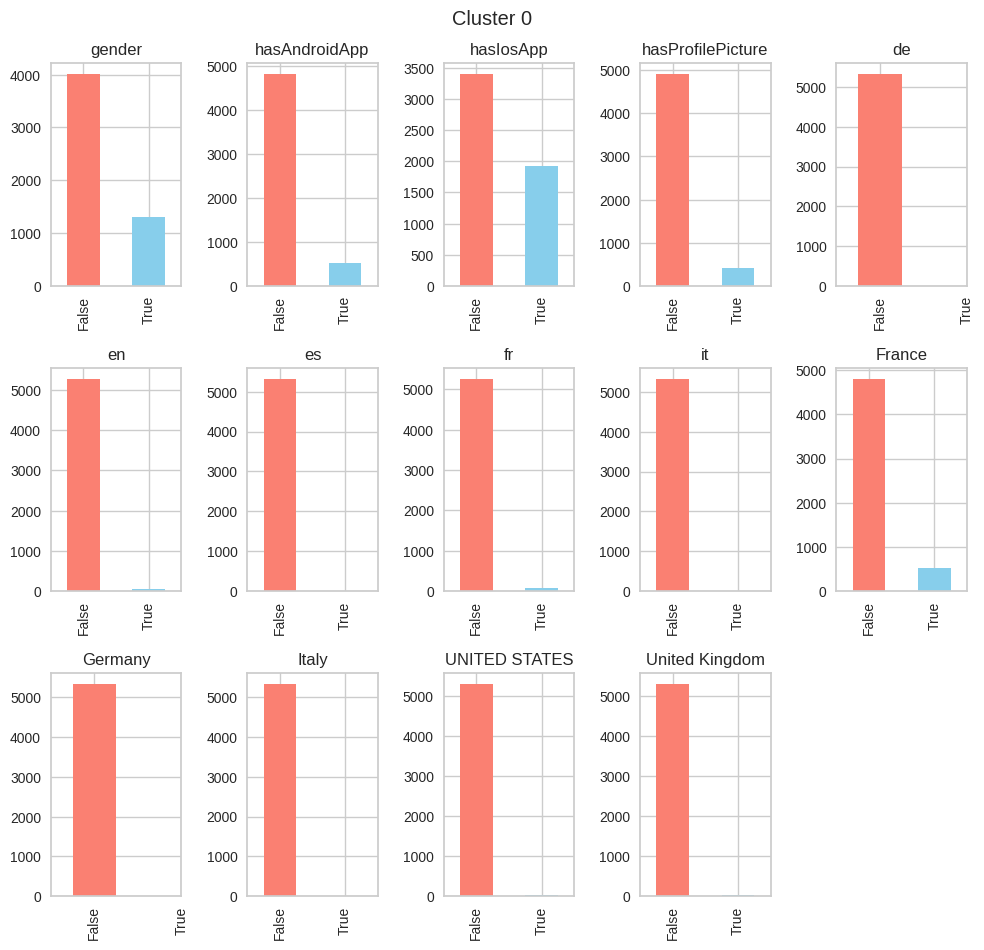

In [ ]:
plt.figure(figsize=(10, 15))

bin_cluster0 = df_cluster0[binary_vars]

for i, column in enumerate(bin_cluster1.columns):
    plt.subplot(5, 5, i + 1)
    bin_cluster0[column].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(column)
    plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.suptitle('Cluster 0', y=1.01)
plt.show()

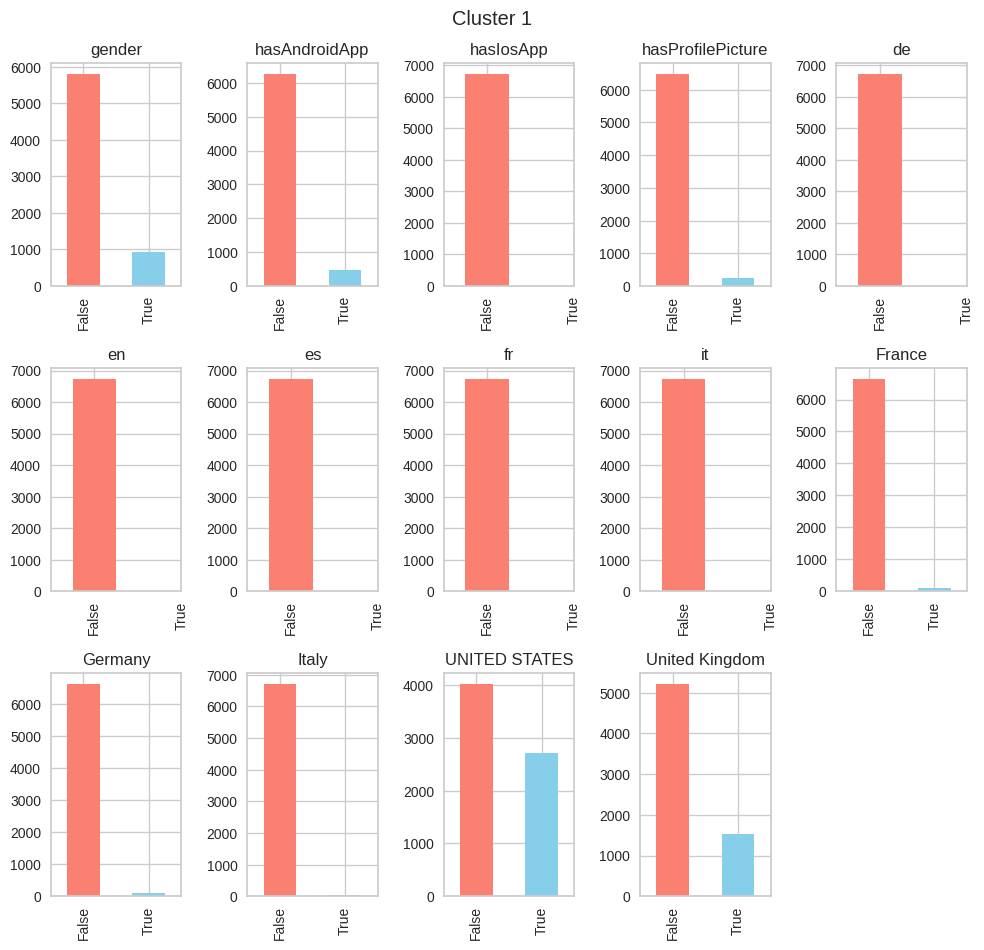

In [ ]:
plt.figure(figsize=(10, 15))

bin_cluster1 = df_cluster1[binary_vars]

for i, column in enumerate(bin_cluster1.columns):
    plt.subplot(5, 5, i + 1)
    bin_cluster1[column].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(column)
    plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.suptitle('Cluster 1', y=1.01)
plt.show()

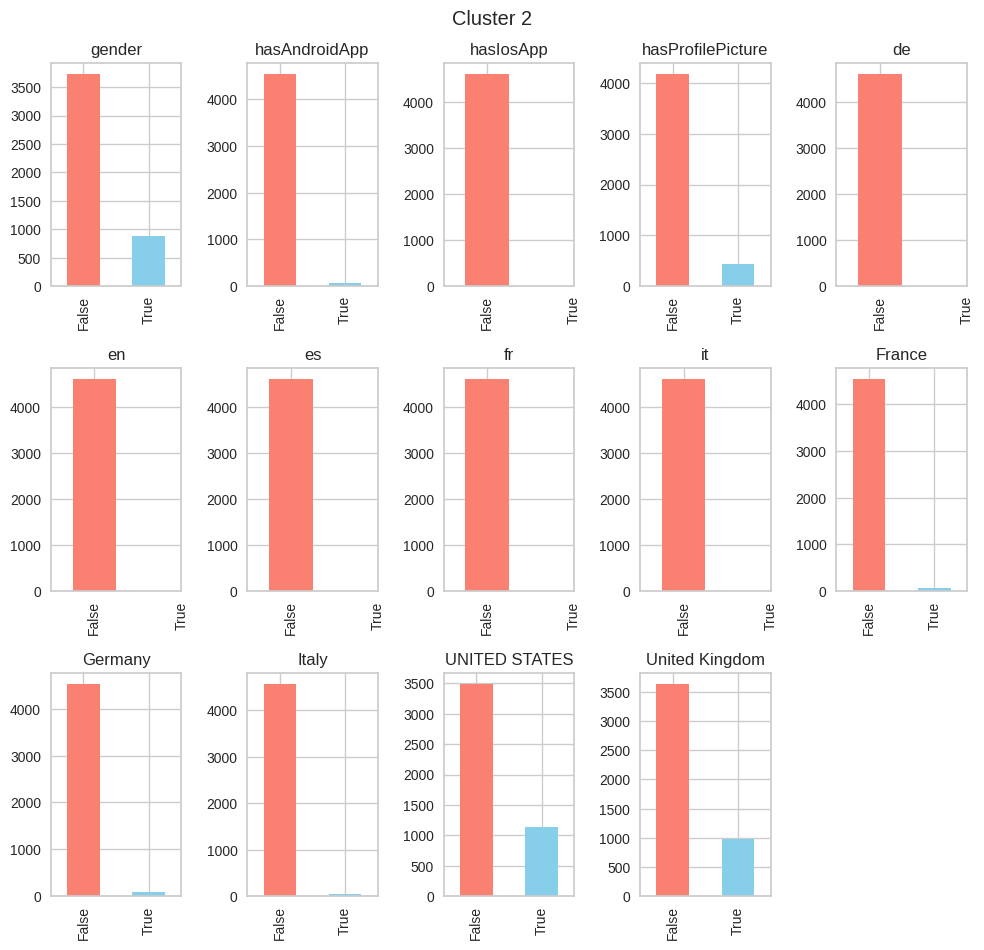

In [ ]:
plt.figure(figsize=(10, 15))

bin_cluster2 = df_cluster2[binary_vars]

for i, column in enumerate(bin_cluster2.columns):
    plt.subplot(5, 5, i + 1)
    bin_cluster2[column].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(column)
    plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.suptitle('Cluster 2', y=1.01)
plt.show()

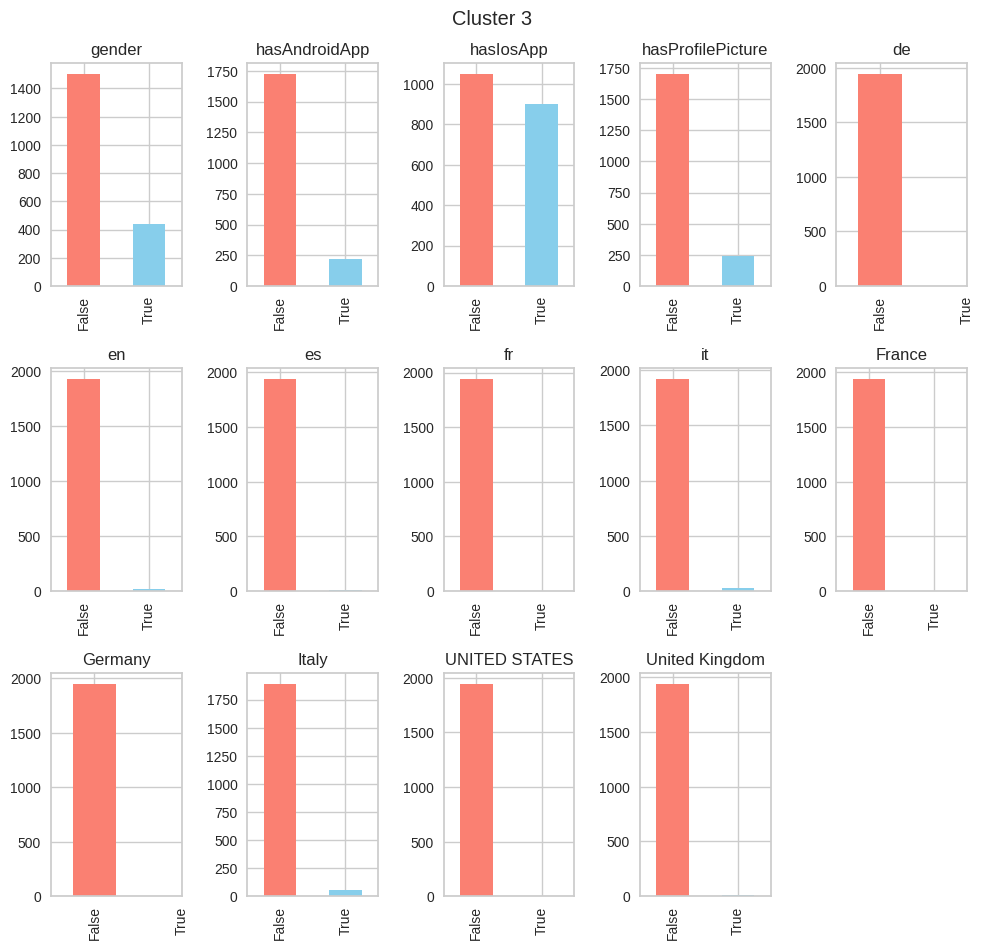

In [ ]:
plt.figure(figsize=(10, 15))

bin_cluster3 = df_cluster3[binary_vars]

for i, column in enumerate(bin_cluster3.columns):
    plt.subplot(5, 5, i + 1)
    bin_cluster3[column].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(column)
    plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.suptitle('Cluster 3', y=1.01)
plt.show()

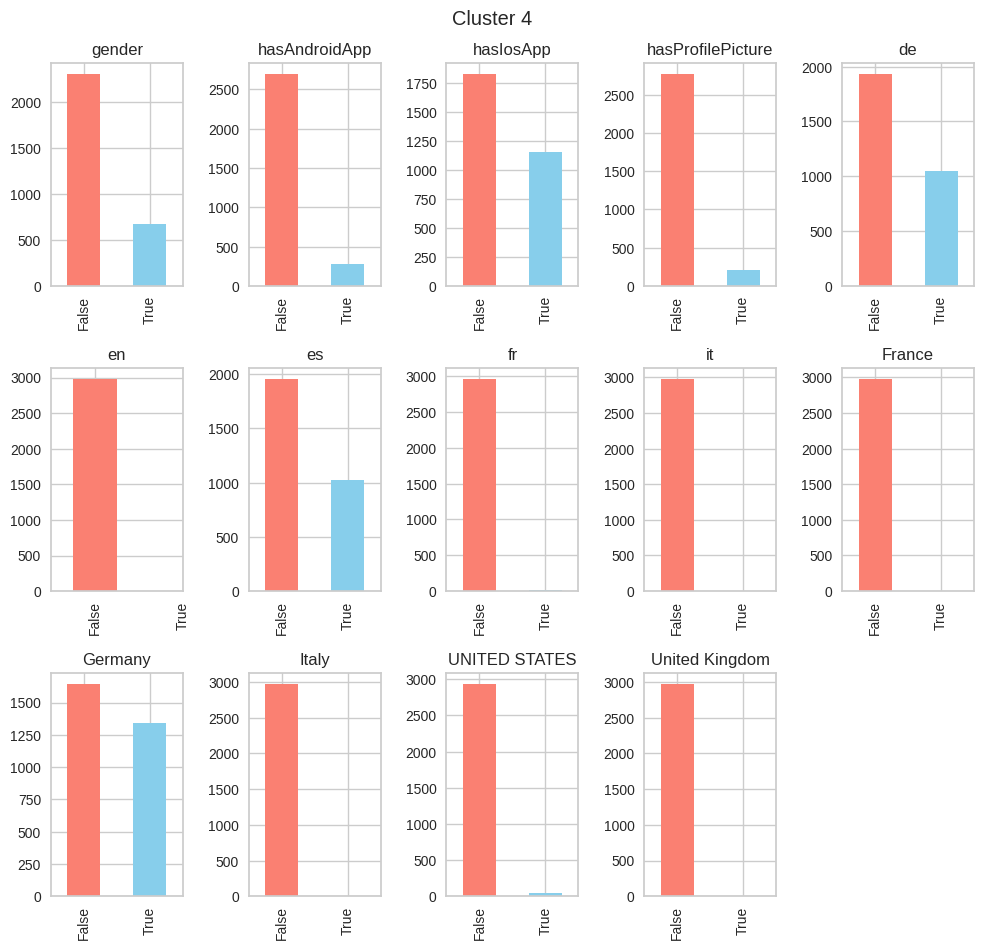

In [ ]:
plt.figure(figsize=(10, 15))

bin_cluster4 = df_cluster4[binary_vars]

for i, column in enumerate(bin_cluster4.columns):
    plt.subplot(5, 5, i + 1)
    bin_cluster4[column].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(column)
    plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.suptitle('Cluster 4', y=1.01)
plt.show()

Now, let's analyse distributions of numerical values for each cluster.

In [ ]:
num_vars = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
            'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
            'productsBought', 'daysSinceLastLogin', 'seniority']

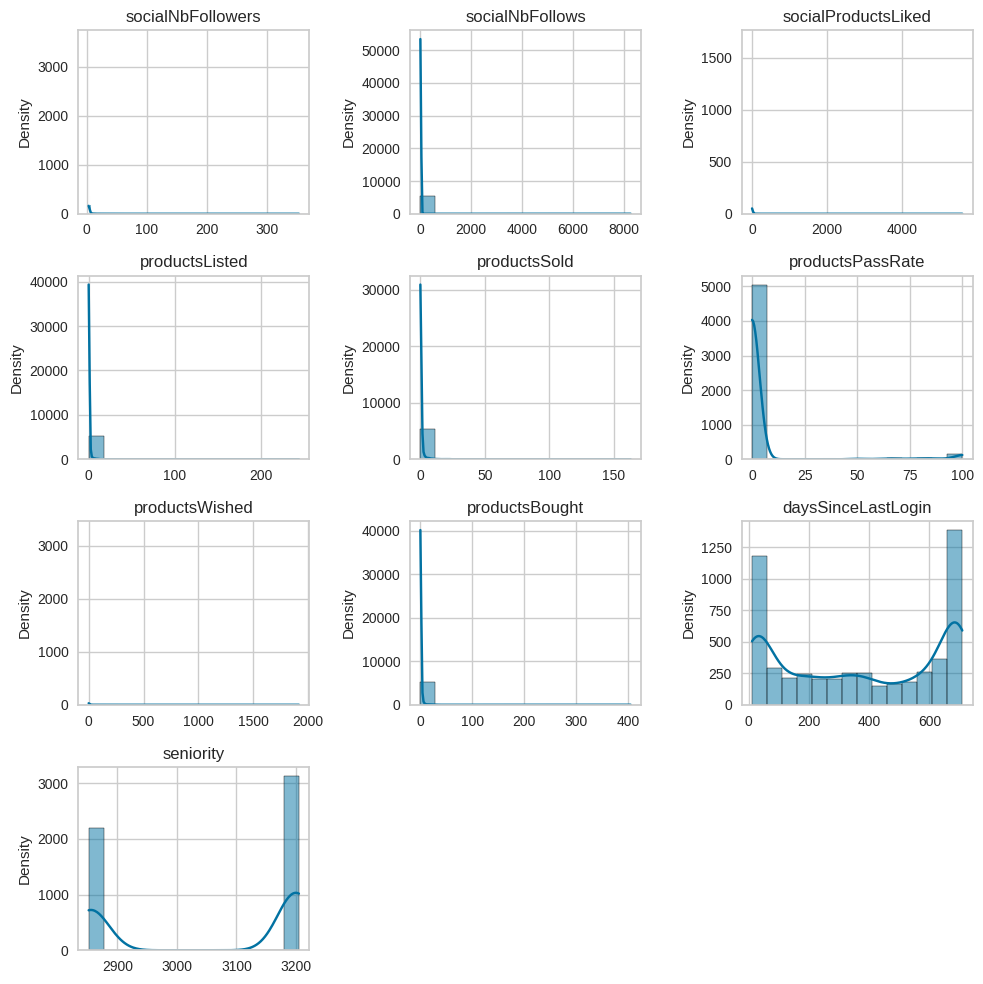

In [ ]:
num_cluster0 = df_cluster0[num_vars]

plt.figure(figsize=(10, 10))
for i, column in enumerate(num_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cluster0[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

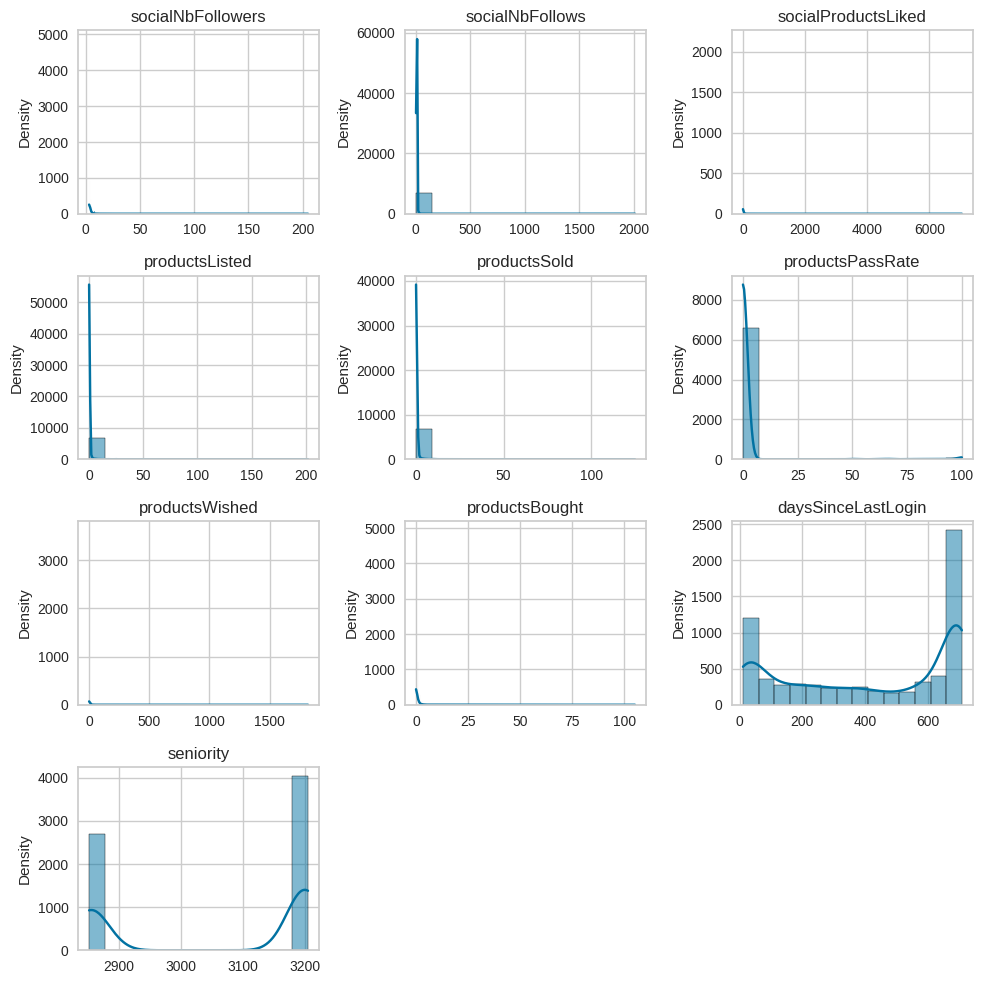

In [ ]:
num_cluster1 = df_cluster1[num_vars]

plt.figure(figsize=(10, 10))
for i, column in enumerate(num_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cluster1[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

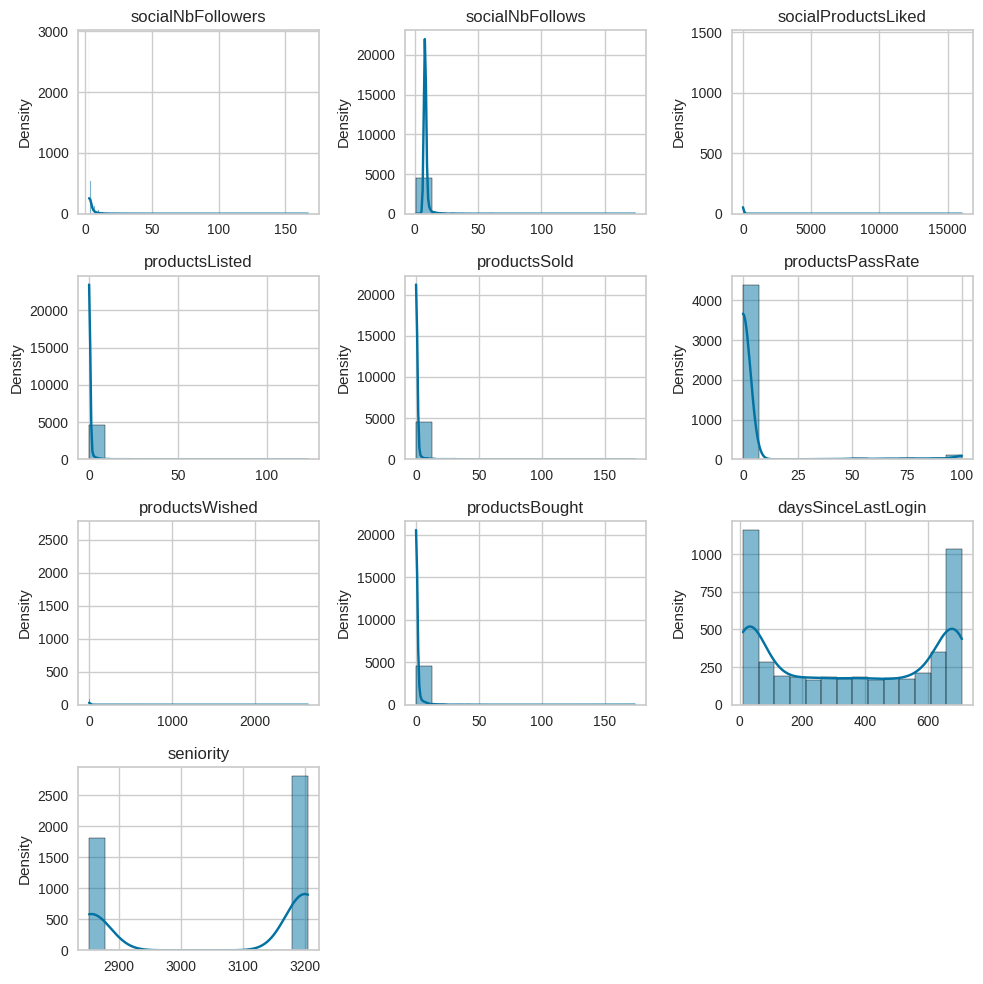

In [ ]:
num_cluster2 = df_cluster2[num_vars]

plt.figure(figsize=(10, 10))
for i, column in enumerate(num_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cluster2[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

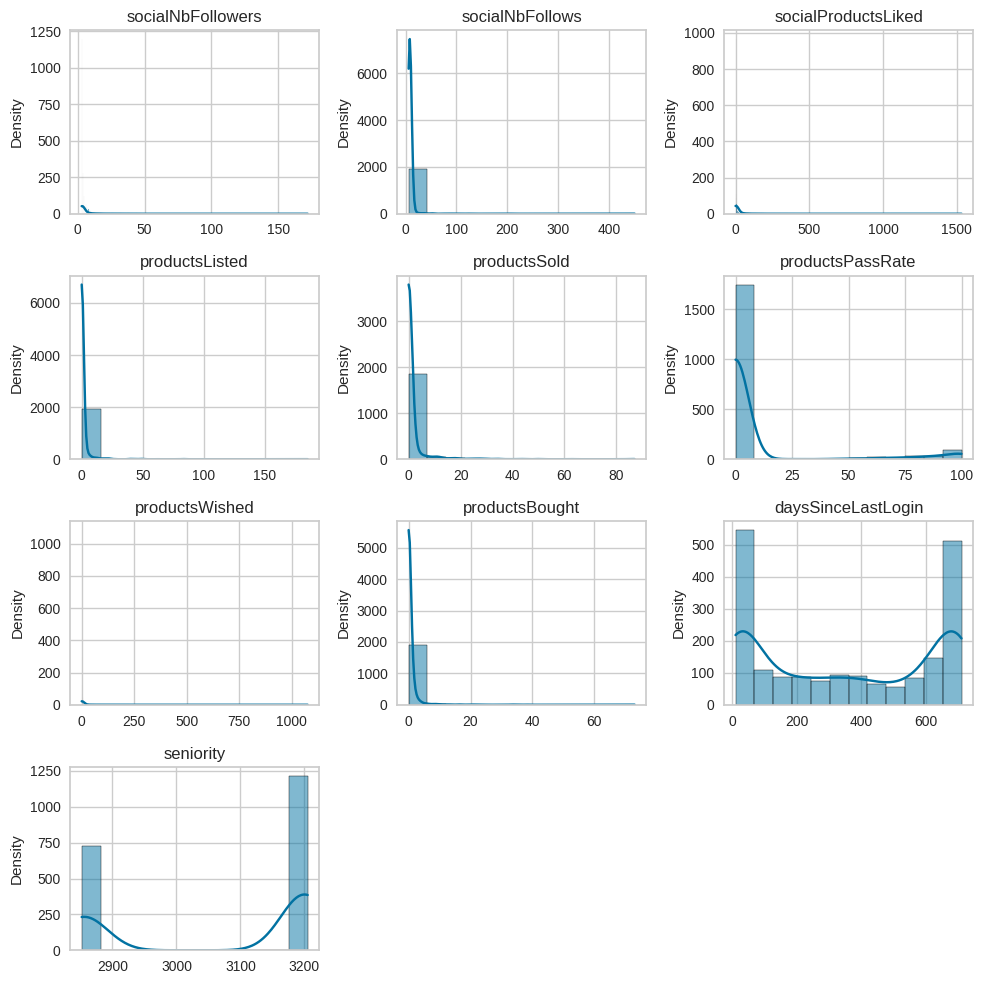

In [ ]:
num_cluster3 = df_cluster3[num_vars]

plt.figure(figsize=(10, 10))
for i, column in enumerate(num_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cluster3[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

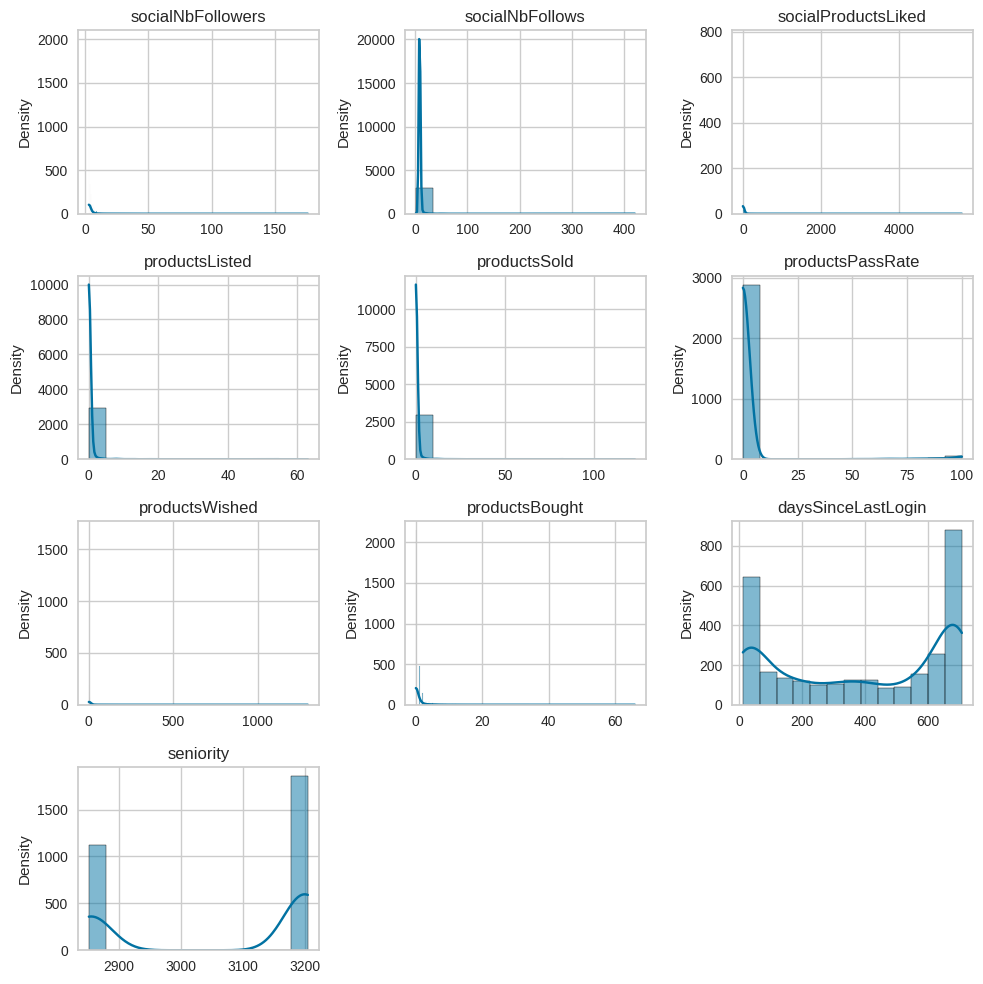

In [ ]:
num_cluster4 = df_cluster4[num_vars]

plt.figure(figsize=(10, 10))
for i, column in enumerate(num_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cluster4[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
num_cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
socialNbFollowers,5335.0,4.318838,6.636254,3.0,3.0,3.0,4.0,353.0
socialNbFollows,5335.0,10.651734,123.611191,1.0,8.0,8.0,8.0,8268.0
socialProductsLiked,5335.0,11.450422,95.084363,0.0,0.0,1.0,4.0,5595.0
productsListed,5335.0,0.407873,4.866660,0.0,0.0,0.0,0.0,244.0
productsSold,5335.0,0.561012,3.973900,0.0,0.0,0.0,0.0,163.0
productsPassRate,5335.0,4.592465,19.869323,0.0,0.0,0.0,0.0,100.0
productsWished,5335.0,5.076476,43.327709,0.0,0.0,0.0,1.0,1916.0
productsBought,5335.0,0.824555,7.576479,0.0,0.0,0.0,0.0,405.0
daysSinceLastLogin,5335.0,373.927273,267.899383,11.0,81.5,375.0,664.0,709.0
seniority,5335.0,3058.264667,169.317498,2852.0,2857.0,3196.0,3200.0,3205.0


In [ ]:
num_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
socialNbFollowers,6742.0,3.972115,5.176670,3.0,3.0,3.0,4.0,205.0
socialNbFollows,6742.0,8.782705,25.997896,2.0,8.0,8.0,8.0,2013.0
socialProductsLiked,6742.0,11.889944,105.041429,0.0,0.0,1.0,4.0,7044.0
productsListed,6742.0,0.283002,3.910284,0.0,0.0,0.0,0.0,202.0
productsSold,6742.0,0.284040,3.420989,0.0,0.0,0.0,0.0,125.0
productsPassRate,6742.0,1.760323,12.512103,0.0,0.0,0.0,0.0,100.0
productsWished,6742.0,5.826906,42.256451,0.0,0.0,0.0,2.0,1820.0
productsBought,6742.0,0.625630,2.859492,0.0,0.0,0.0,1.0,105.0
daysSinceLastLogin,6742.0,418.120587,271.374647,11.0,132.0,486.0,694.0,709.0
seniority,6742.0,3062.526105,168.601207,2852.0,2857.0,3196.0,3201.0,3205.0


In [ ]:
num_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
socialNbFollowers,4622.0,5.135872,6.848638,3.0,3.0,3.0,5.0,167.0
socialNbFollows,4622.0,8.736910,4.849389,1.0,8.0,8.0,8.0,174.0
socialProductsLiked,4622.0,33.079186,278.022599,0.0,1.0,4.0,15.0,16040.0
productsListed,4622.0,0.396582,3.483291,0.0,0.0,0.0,0.0,123.0
productsSold,4622.0,0.636954,5.440334,0.0,0.0,0.0,0.0,174.0
productsPassRate,4622.0,4.051579,18.484400,0.0,0.0,0.0,0.0,100.0
productsWished,4622.0,9.791216,71.185180,0.0,0.0,0.0,2.0,2635.0
productsBought,4622.0,1.006274,5.041846,0.0,0.0,0.0,0.0,174.0
daysSinceLastLogin,4622.0,354.343358,268.237211,11.0,60.0,353.0,646.0,709.0
seniority,4622.0,3065.276504,168.068112,2852.0,2857.0,3197.0,3201.0,3205.0


In [ ]:
num_cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
socialNbFollowers,1947.0,5.529019,8.529530,3.0,3.0,3.0,4.0,172.0
socialNbFollows,1947.0,9.701592,16.669874,6.0,8.0,8.0,8.0,450.0
socialProductsLiked,1947.0,17.016949,78.890809,0.0,0.0,2.0,7.0,1533.0
productsListed,1947.0,1.221366,7.313407,0.0,0.0,0.0,0.0,185.0
productsSold,1947.0,1.341037,5.919968,0.0,0.0,0.0,0.0,87.0
productsPassRate,1947.0,8.733436,26.524182,0.0,0.0,0.0,0.0,100.0
productsWished,1947.0,7.574730,46.734418,0.0,0.0,0.0,2.0,1075.0
productsBought,1947.0,0.626605,3.269305,0.0,0.0,0.0,0.0,73.0
daysSinceLastLogin,1947.0,354.400103,275.407900,11.0,47.0,342.0,659.0,709.0
seniority,1947.0,3071.167437,166.596122,2852.0,2857.0,3197.0,3201.0,3205.0


In [ ]:
num_cluster4.describe().T

,count,mean,std,min,25%,50%,75%,max
socialNbFollowers,2984.0,4.533847,6.143512,3.0,3.0,3.0,4.0,176.0
socialNbFollows,2984.0,8.577078,8.008047,1.0,8.0,8.0,8.0,421.0
socialProductsLiked,2984.0,19.541890,156.730816,0.0,0.0,1.0,7.0,5598.0
productsListed,2984.0,0.312668,2.696472,0.0,0.0,0.0,0.0,63.0
productsSold,2984.0,0.488941,4.547423,0.0,0.0,0.0,0.0,123.0
productsPassRate,2984.0,2.735590,15.488314,0.0,0.0,0.0,0.0,100.0
productsWished,2984.0,8.825067,54.176475,0.0,0.0,0.0,2.0,1295.0
productsBought,2984.0,0.843834,3.038651,0.0,0.0,0.0,1.0,66.0
daysSinceLastLogin,2984.0,393.059651,271.229117,11.0,96.0,425.0,677.0,709.0
seniority,2984.0,3070.510724,166.776586,2852.0,2857.0,3197.0,3201.0,3205.0


**Description of obtained Clusters**

Remider: We performed clustering on the dataset of only **active** users.

0. Cluster 0 (5335 observations):

From bar plots of binary variables we can see that:
* There is a large portion of female users compared to other clusters, but still majority of men.
* Many users have IOS app copared to others
* Some poeple from France.
* Other binary variables are false.

From the distributions of numerical variables we see that:
* Customers from this cluster have the largest max `socialNbFollows` and `socialNbFollowers` compared to other clusters.
* This cluster has highest mean of `socialProductsLiked` compared to other clusters.
* Maximum max`productsBought` compared to other clusters

Overall, this cluster is the second largest cluster. It contains mostly of male users from France, and other countries that we did not mention in our dataset, with IOS app. Such users are very active and follow many other people, and do have many followers, they are also active buyers and sellers.

1. Cluster 1 (6742 observations):

From bar plots of binary variables we can see that:
* Most people from this cluster are males (smallest portion of women)
* Noone has IOS app
* Some poeple from US, some people from UK
* Other binary variables are false.

From the distributions of numerical variables we see that:
* Customers from this cluster have the smallest max `socialNbFollows` compared to other clusters.
* This cluster has highest mean of `socialProductsLiked` compared to other clusters.
* Mean for `productsSold` in this cluster is the smallest
* `productsBought` has one of the smallest means, however second highest max

Overall, this cluster is the largest cluster. It contains mostly of male users from US and UK, and other countries that we did not mention in our dataset, without app. Such users do not follow many other people, and do not have many followers, but they like many products and mostly buy products, rather than sell.  


2. Cluster 2 (4622 observation):

From bar plots of binary variables we can see that:

* Not a small portion of women compared to other clusters, but still majority of men users.
* In this cluster there are some portion of users from France.
* Some users have IOS app


From the distributions of numerical variables we see that:

* This cluster has largest max of `socialProductsLiked`
* Not a big number of `socialNbFollows` and `socialNbFollowers`
* They have good numbers of `productsBought` and `productsSold` compared to other clusters

Overall, some user are from France, and there are many male customers in this clusters. These users are not really socially active. They have lots of products liked. And they buy good amount of products and they are active sellors too.

3. Cluster 3 (1947 observations):

From bar plots of binary variables we can see that:

* Largest amount of users with IOS app
* The countries of these users are not mentioned in our dataset (less popular countries)
* Have profile pictures

From the distributions of numerical variables we see that:

* These users have the lowest metrics for `socialNbFollowers`
* Small number of `productsWished`
* Smallest numbers for `productsBought`

Overall, this is the smallest cluster. Users from this cluster are from less popular countries and most users use this shop from IOS app. Such users do not have many followers and follows, too. They are not really active at buying and selling.

4. Cluster 4 (2984 observations):

From bar plots of binary variables we can see that:

* Users from Germany in german language
* Use IOS app
* Users use spanish language in app

From the distributions of numerical variables we see that:

* Activity really close to users from cluster 3: the difference is that they like more products and have more products in their wishlists.


Overall, Customers from Germany and spanish speaking countries. They are not active buyers and sellers, do not follow and do not have many followers, but they have big wish lists and lists of liked products.

### 4.2 Classification

*We then classify the dataset using at least three classification methods, such as*

* Logistic Regression.
* K-Nearest Neighbors.
* Decision Trees.
* Support Vector Machine.

*Discuss the results and show which classification method worked best and the reason.*

**Dataset:** For classification we are going to use only "Active" users

**Output variable:** `popularity`

**Evaluation metrics:** F1-Score, Confusion Matrix

In [ ]:
df_act = df[df['Active'] == True]
df_active = df_act.copy()
y = df_active['popularity']
X = df_active.drop(columns=['popularity', 'Active'])

f1_scores = []
accuracies = []
class_model_names = []

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,de,en,es,fr,it,France,Germany,Italy,UNITED STATES,United Kingdom
6,3,8,4,0,0,0.0,0,0,1,0,0,1,591,3205,0,1,0,0,0,0,0,0,0,1
17,3,8,370,0,0,0.0,1,0,1,0,0,1,42,3205,0,1,0,0,0,0,0,0,0,0
18,3,8,1,0,0,0.0,0,0,1,0,0,1,32,3205,0,1,0,0,0,0,0,0,1,0
27,3,8,27,0,0,0.0,0,0,0,0,1,1,669,3205,1,0,0,0,0,0,1,0,0,0
29,3,8,0,0,0,0.0,9,0,1,1,0,1,463,3205,0,1,0,0,0,0,0,0,0,0


Let's look at the histogram of `popularity` variable

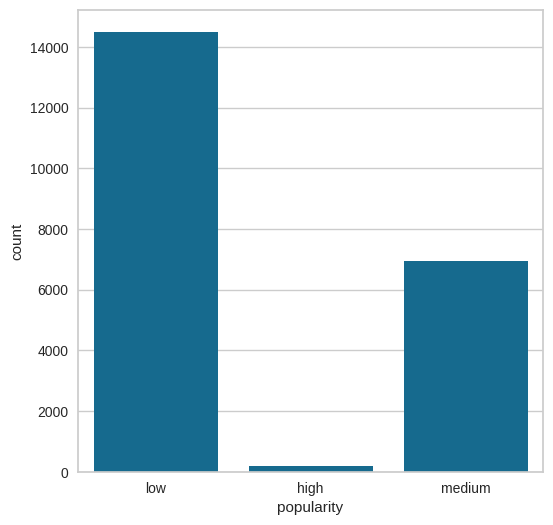

In [ ]:
sns.countplot(data=df_active, x='popularity')
plt.show()

In [ ]:
y_test.value_counts()

low       4313
medium    2122
high        54
Name: popularity, dtype: int64

#### 4.2.1 Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.7498844197873324
F1 Score: 0.7065689681663092
Classification Report:
              precision    recall  f1-score   support

        high       0.63      0.22      0.33        54
         low       0.74      0.98      0.84      4313
      medium       0.82      0.30      0.44      2122

    accuracy                           0.75      6489
   macro avg       0.73      0.50      0.54      6489
weighted avg       0.77      0.75      0.71      6489



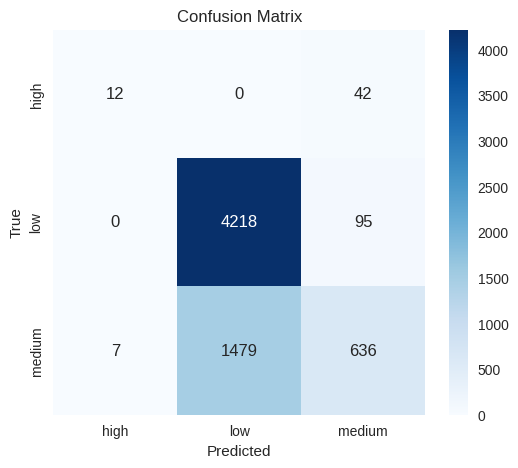

In [ ]:
# Calculate F1 score and accuracy score
y_pred = log_reg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1_scores.append(f1)
class_model_names.append("Log Regression")
accuracies.append(acc)

#### 4.2.2 K-Nearest Neighbors

Accuracy: 0.7893357990445369
F1 Score: 0.771855742705113
Classification Report:
              precision    recall  f1-score   support

        high       0.81      0.24      0.37        54
         low       0.79      0.94      0.86      4313
      medium       0.79      0.49      0.60      2122

    accuracy                           0.79      6489
   macro avg       0.80      0.56      0.61      6489
weighted avg       0.79      0.79      0.77      6489



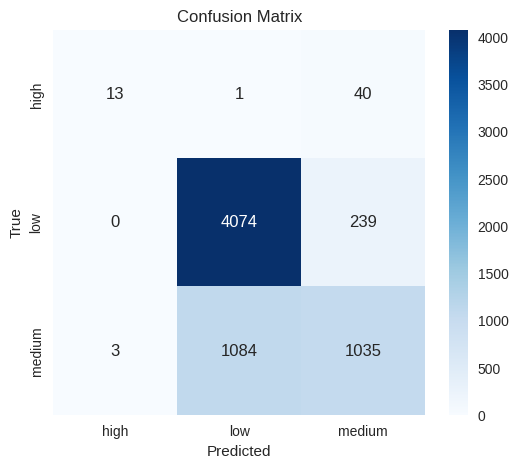

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

f1_scores.append(f1)
class_model_names.append("KNN (n = 5)")
accuracies.append(acc)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7959623979041455
F1 Score: 0.783409194019587
Classification Report:
              precision    recall  f1-score   support

        high       0.79      0.35      0.49        54
         low       0.80      0.93      0.86      4313
      medium       0.77      0.53      0.63      2122

    accuracy                           0.80      6489
   macro avg       0.79      0.61      0.66      6489
weighted avg       0.79      0.80      0.78      6489



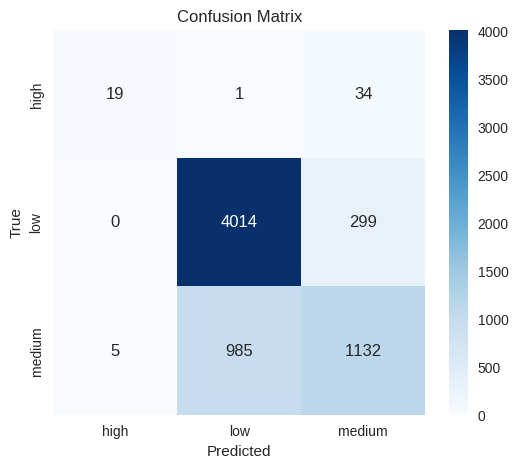

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

f1_scores.append(f1)
accuracies.append(acc)
class_model_names.append("KNN (n = 3)")

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.8065957774695639
F1 Score: 0.7902930574272377
Classification Report:
              precision    recall  f1-score   support

        high       0.95      0.39      0.55        54
         low       0.80      0.96      0.87      4313
      medium       0.84      0.51      0.63      2122

    accuracy                           0.81      6489
   macro avg       0.86      0.62      0.69      6489
weighted avg       0.81      0.81      0.79      6489



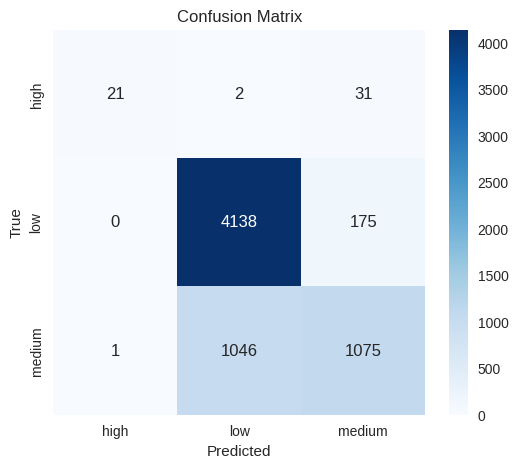

In [ ]:
# Perform Grid Search on knn
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

f1_scores.append(f1)
accuracies.append(acc)
class_model_names.append("KNN best")

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.3 Decision Trees

Accuracy: 0.9721066420095547
F1 Score: 0.9716558481577835
Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.48      0.56        54
         low       0.98      0.98      0.98      4313
      medium       0.95      0.96      0.96      2122

    accuracy                           0.97      6489
   macro avg       0.87      0.81      0.83      6489
weighted avg       0.97      0.97      0.97      6489



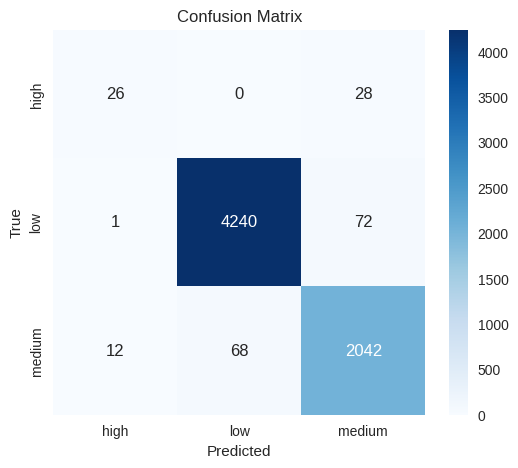

In [ ]:
clf = DecisionTreeClassifier(max_features = "sqrt")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

f1_scores.append(f1)
accuracies.append(acc)
class_model_names.append("Decision Tree")

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.4 Support Vector Machine

Accuracy: 0.6880875327477269
F1 Score: 0.584824039076884
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.02      0.04        54
         low       0.68      1.00      0.81      4313
      medium       0.81      0.07      0.14      2122

    accuracy                           0.69      6489
   macro avg       0.83      0.36      0.33      6489
weighted avg       0.73      0.69      0.58      6489



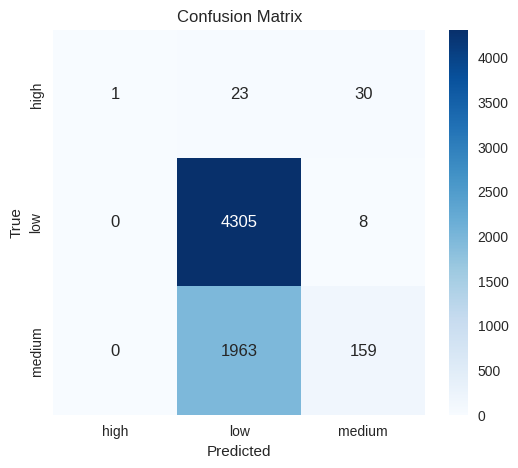

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

f1_scores.append(f1)
accuracies.append(acc)
class_model_names.append("Support Vector Machine")

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.5 Comparison of Classification methods

In [ ]:
metrics = {
    'Classification Model' : class_model_names,
    'Accuracy': accuracies,
    'F1-Score': f1_scores
}

classification_metrics = pd.DataFrame(metrics)
classification_metrics

,Classification Model,Accuracy,F1-Score
0,Log Regression,0.749884,0.706569
1,KNN (n = 5),0.789336,0.771856
2,KNN (n = 3),0.795962,0.783409
3,KNN best,0.806596,0.790293
4,Decision Tree,0.972107,0.971656
5,Support Vector Machine,0.688088,0.584824


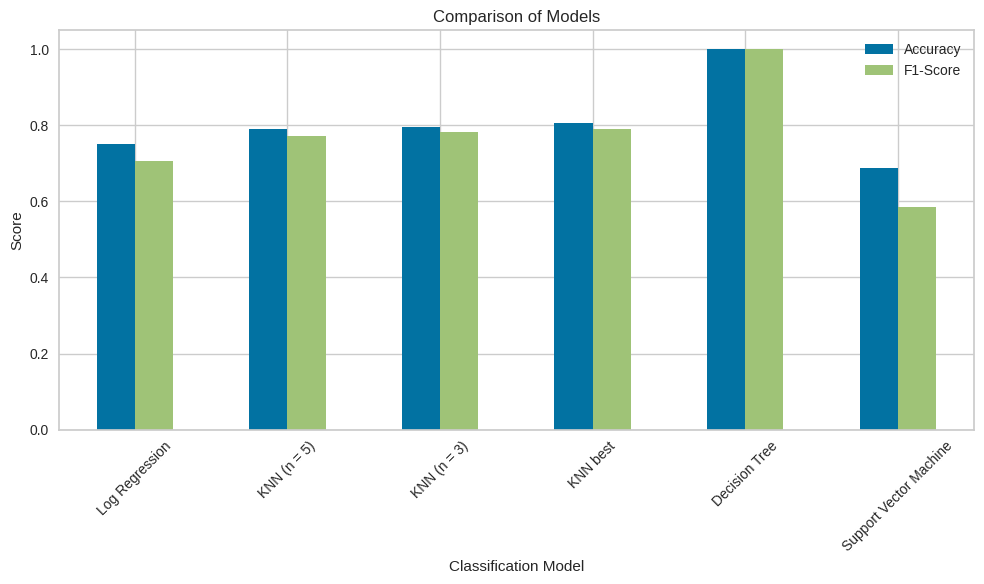

In [ ]:
classification_metrics.set_index('Classification Model', inplace=True)

classification_metrics.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Classification Model')
plt.ylabel('Score')
plt.title('Comparison of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In order to choose the best model we will use F1 score and confusion matrix, because this dataset is class imbalanced and using just accuracy score will not be informative. We are mostly interested in classification of high popularity, as we are interested in finding out if user is popular based on the given data. So on the bases of what task is more important for classification, knn(best) or Decision Tree should be chosen.

Thus, depending on what the task is we can choose from 2 best models:

1) Decision Tree: If we are interested in correctly classifying all high popularity and we want to catch all popular users with high accuracy, but we do not care if we misclassify other classes as high popularity. (interested in having high recall for high popularity class)

2) KNN (best): If we do not want to misclassify high popularity, and for us it is very important not to assign high popularity to other classes, and not that important to correcly catch all observations with high popularity. (interested in having high precision for high popularity class)

### 4.3 Key Learnings

4.3.1 Clustering results



After obtaining optimal model by comparing different clustering methods we used K-means clustering after PCA. And we got five clusters of active users. After clustering we observed that users that have the most followers and follows buy and sell most of products. Thus, increasing social activity of users increases the number of buying and selling products. Also, creating proper marketing strategy for users from clusters 3 and 4 can increase this online shop profit.

From comparison of various clustering methods we observed that PCA helped to increase the performance of models. Because clustering methods work better on lower dimentions.

4.3.2 Classification results

For classification as an output we have variable `popularity`. From the bar plot we observed that the dataset is class imbalanced. Thus, when evaluating the performace we looked at F1-score and looked at confusion matrices. The best models for the given classification task were knn with k = 3 and tuned hyperparameters using grid search and Decision Tree. And based on what we are mostly interested in: higher recall or precision for "high" popularity class. We can choose from these classification models.

